
<a class="anchor" id="Integration">
    
# 1.Data Integration 


</a>


- 1.1 Import the libraries. <br>
- 1.2 Loading the csv files. <br>

### 1.1 Import the libraries.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
from scipy import stats
from sklearn import preprocessing #Label Encoder.
from sklearn.preprocessing import MinMaxScaler #Scaling the data. But will not be used because we scale the datasets on front.
from scipy.stats.mstats import winsorize # For treat the outliers the package using the winsorize.
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix #Calculate the Confusion Matrix.
from sklearn.metrics import roc_curve, roc_auc_score #Calculate Roc curve.
from sklearn.ensemble import RandomForestClassifier #Random Forest Model.
from sklearn.linear_model import LogisticRegression #Logistic Regression Model.
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting Model.
from sklearn.naive_bayes import GaussianNB #Naive Bayes Model.
from sklearn.tree import DecisionTreeClassifier # Decision Tree Model.
import tensorflow as tf #!pip install tensorflow[and-cuda] Deep Model.
from mpl_toolkits.mplot3d import Axes3D   #3D Graphs! Deep Model.

### 1.2 Loading the csv files.

In [6]:
# Sets the pandas dataframe options to display all columns/ rows.
pd.options.display.max_columns = None
pd.options.display.max_rows = 26
# This is the method to ensure that Pandas displays all columns in a data frame.

# Loading Data

#Initial Data for be treated:
train = pd.read_csv('train_kaggle_Project (train_validation_dataset).csv', encoding='latin1') # with a reference test table for dataset serial number.


<a class="anchor" id="Exploration">
    
# 2.Data Exploration 


</a>


- 2.1 Checking the Variable Names and the Type of Data. <br>
- 2.2 Checking the Data Shape & Datatypes. <br>
- 2.3 Checking the Data Duplicates. <br>
- 2.4 Checking Missing Values. <br>
- 2.5 Treating the target column (loan_status).
- 2.6 Plotting the Dataset (Not Treated). <br>

### 2.1 Checking the Variable Names and the Type of Data.

In [7]:
# The first 5 rows, of the respective categories of our data (The Header of the Data):
train.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,risk
0,1,2500,2500,2500.0,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,debt_consolidation,CA,30.46,0,Jan-12,0.0,11,1,15603,37.0,19,0.0,30026.442500,Fully Paid,0
1,2,30000,30000,30000.0,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-18,credit_card,OH,50.53,0,Jun-09,0.0,18,0,34971,64.5,37,0.0,40856.678960,Fully Paid,0
2,3,5000,5000,5000.0,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,credit_card,WA,18.92,0,Feb-99,0.0,9,0,25416,29.9,19,0.0,20215.792430,Fully Paid,0
3,4,4000,4000,4000.0,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-18,credit_card,TX,4.64,0,Dec-03,0.0,12,0,4472,15.3,25,0.0,4549.217149,Fully Paid,0
4,5,30000,30000,30000.0,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-18,credit_card,MA,12.37,0,Oct-97,0.0,21,0,36812,65.7,37,0.0,8735.148975,Fully Paid,0


In [8]:
#Dataframe only with the qualitative categories from our dataset
train2 = train[['term','grade','emp_title', 'emp_length','home_ownership', 'verification_status',
                    'purpose','addr_state']]
train2.head()

,term,grade,emp_title,emp_length,home_ownership,verification_status,purpose,addr_state
0,36 months,C,Chef,10+ years,RENT,Not Verified,debt_consolidation,CA
1,60 months,D,Postmaster,10+ years,MORTGAGE,Source Verified,credit_card,OH
2,36 months,D,Administrative,6 years,MORTGAGE,Source Verified,credit_card,WA
3,36 months,D,IT Supervisor,10+ years,MORTGAGE,Source Verified,credit_card,TX
4,60 months,C,Mechanic,10+ years,MORTGAGE,Not Verified,credit_card,MA


In [9]:
#Dataframe only with the categories of integers,float from our dataset.
train3= train[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
    'annual_inc','dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal',
                'revol_util', 'total_acc', 'out_prncp','total_pymnt','earliest_cr_line',
                      'issue_d', 'risk']]
train3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,earliest_cr_line,issue_d,risk
0,2500,2500,2500.0,13.56,84.92,55000.0,30.46,0,0.0,11,1,15603,37.0,19,0.0,30026.442500,Jan-12,Dec-18,0
1,30000,30000,30000.0,18.94,777.23,90000.0,50.53,0,0.0,18,0,34971,64.5,37,0.0,40856.678960,Jun-09,Dec-18,0
2,5000,5000,5000.0,17.97,180.69,59280.0,18.92,0,0.0,9,0,25416,29.9,19,0.0,20215.792430,Feb-99,Dec-18,0
3,4000,4000,4000.0,18.94,146.51,92000.0,4.64,0,0.0,12,0,4472,15.3,25,0.0,4549.217149,Dec-03,Dec-18,0
4,30000,30000,30000.0,16.14,731.78,57250.0,12.37,0,0.0,21,0,36812,65.7,37,0.0,8735.148975,Oct-97,Dec-18,0


### 2.2 Checking the Data Shape & Datatypes.

In [10]:
# The structure, how many rows and columns that we have in our data:
train.shape

(310704, 29)

In [11]:
#For have a idea of the specific datatypes of the respective categories:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310704 entries, 0 to 310703
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   310704 non-null  int64  
 1   loan_amnt            310704 non-null  int64  
 2   funded_amnt          310704 non-null  int64  
 3   funded_amnt_inv      310704 non-null  float64
 4   term                 310704 non-null  object 
 5   int_rate             310704 non-null  float64
 6   installment          310704 non-null  float64
 7   grade                310704 non-null  object 
 8   emp_title            281139 non-null  object 
 9   emp_length           288089 non-null  object 
 10  home_ownership       310704 non-null  object 
 11  annual_inc           310704 non-null  float64
 12  verification_status  310704 non-null  object 
 13  issue_d              310704 non-null  object 
 14  purpose              310704 non-null  object 
 15  addr_state       

### 2.3 Checking the Data Duplicates.

In [12]:
# Identify the duplicates of dataset:
duplicate_rows = train[train.duplicated()]
duplicate_rows # We can observe that we have 0 duplicates. 

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,risk


In [13]:
# Check the percentage of duplicates:
percentage_duplicates = (len(duplicate_rows) / len(train)) * 100 

# From all values of dataset the percentage that duplicates represent:
print(f"Percentage of duplicates: {percentage_duplicates:.2f}%") # floating-point number round to 2 decimal houses.

Percentage of duplicates: 0.00%


### 2.4 Checking Missing Values.


In [14]:
# We can understand according the shape of our data, the absolute of the missing values (NA Values).
train.isna().sum()

id                 0
loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
term               0
                  ..
total_acc          0
out_prncp          0
total_pymnt        0
loan_status        0
risk               0
Length: 29, dtype: int64

In [15]:
# We can understand according the shape of our data, the percentage of the missing values (NA Values).

# Sum of all mising values for each different categorie/ all values of dataset.
train.isna().sum()/len(train)*100

id                 0.0
loan_amnt          0.0
funded_amnt        0.0
funded_amnt_inv    0.0
term               0.0
                  ... 
total_acc          0.0
out_prncp          0.0
total_pymnt        0.0
loan_status        0.0
risk               0.0
Length: 29, dtype: float64

### 2.5 Treating the target column (loan_status).


In [16]:
#We are basically, treating the Loan_Status column for we could see the Loan types according the specific categories
#in bar graphs:

#Here we are just replacing the values for Default and Non-Default if we have that respective values in loan_status column in
#train dataset.
train['loan_status'] = np.where(train['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']),'Default', 'Non-Default')

### 2.6 Plotting the Dataset (Not Treated).

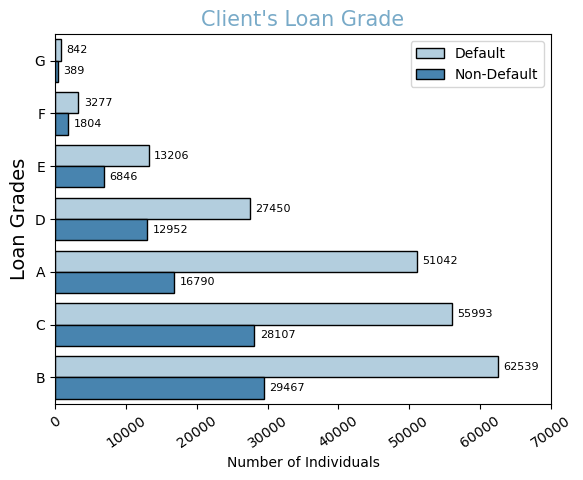

In [17]:
#Bar Graph Amount of the loan applied for by the borrower:
order_counts = train['grade'].value_counts().sort_values().index #Order the count values.

ax2=sns.countplot(y = 'grade', hue='loan_status', data = train, order = order_counts, edgecolor='black', palette="Blues")
plt.title("Client's Loan Grade", color="#78AAC8", size=15 )
plt.legend(['Default','Non-Default'])
plt.xlabel('Number of Individuals', loc='center')
plt.ylabel('Loan Grades', loc='center', size=14)
plt.xticks(rotation=35)
ax2.bar_label(ax2.containers[0], size=8, padding=4)
ax2.bar_label(ax2.containers[1], size=8, padding=4)

ax2.set_xlim(right=70000)
plt.show()

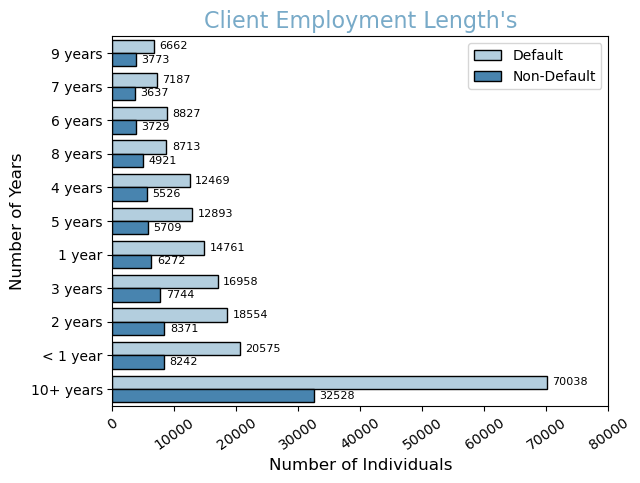

In [18]:
#Bar Graph of start date and end date of an individual's employment within an organization:
order_counts = train['emp_length'].value_counts().sort_values().index #Order the count values.
ax3=sns.countplot(y = 'emp_length', hue='loan_status', data = train, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client Employment Length's", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.legend(['Default','Non-Default'])
plt.ylabel('Number of Years',size=12)
plt.xlabel('Number of Individuals',size=12)
ax3.bar_label(ax3.containers[0], size=8, padding=4) 
ax3.bar_label(ax3.containers[1], size=8, padding=4)

ax3.set_xlim(right=80000)

plt.show()

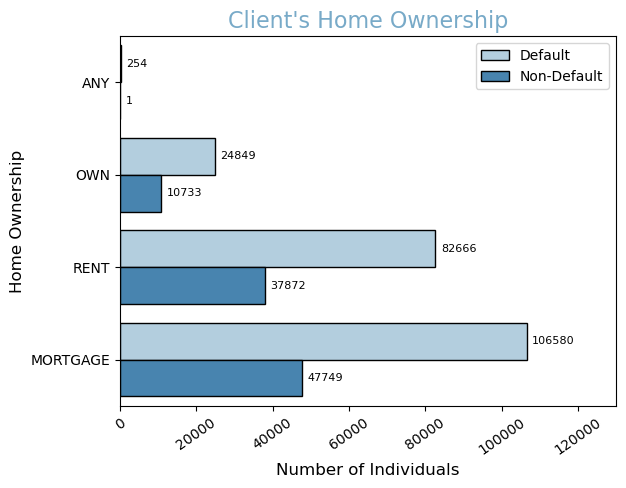

In [19]:
#Bar Graph home ownership status provided by the borrower during registration:
order_counts = train['home_ownership'].value_counts().sort_values().index #Order the count values.
ax4=sns.countplot(y = 'home_ownership', hue='loan_status', data = train, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client's Home Ownership", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.legend(['Default','Non-Default'])
plt.ylabel('Home Ownership',size=12)
plt.xlabel('Number of Individuals',size=12)
ax4.bar_label(ax4.containers[0], size=8, padding=4)
ax4.bar_label(ax4.containers[1], size=8, padding=4)

ax4.set_xlim(right=130000)

plt.show()

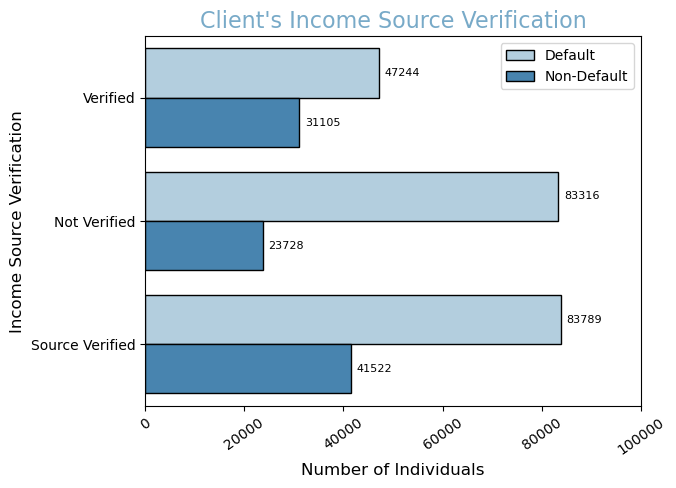

In [20]:
#Bar Graph Income was verified by LC, not verified, or if the income source was verified:
order_counts = train['verification_status'].value_counts().sort_values().index #Order the count values.
ax5=sns.countplot(y = 'verification_status', hue='loan_status',  data = train, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client's Income Source Verification", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.legend(['Default','Non-Default'])
plt.ylabel('Income Source Verification',size=12)
plt.xlabel('Number of Individuals',size=12)
ax5.bar_label(ax5.containers[0], size=8, padding=4)
ax5.bar_label(ax5.containers[1], size=8, padding=4)

ax5.set_xlim(right=100000)

plt.show()

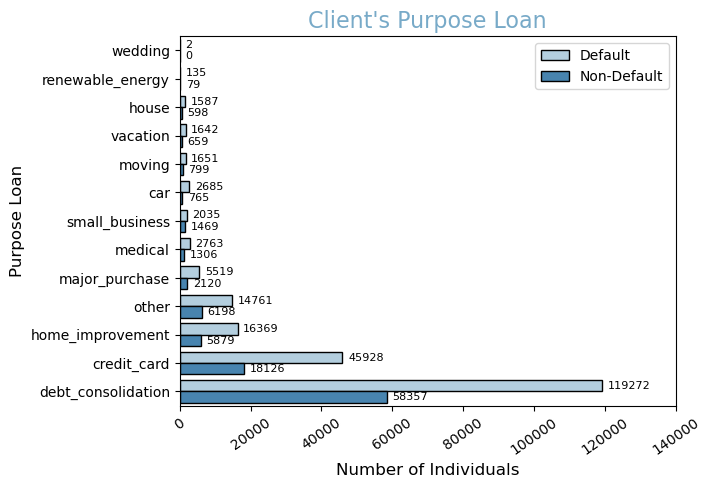

In [21]:
#Bar Graph borrower Purpose for the loan request:
order_counts = train['purpose'].value_counts().sort_values().index #Order the count values.
ax6=sns.countplot(y = 'purpose',  hue='loan_status', data = train, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client's Purpose Loan", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.legend(['Default','Non-Default'])
plt.ylabel('Purpose Loan',size=12)
plt.xlabel('Number of Individuals',size=12)
ax6.bar_label(ax6.containers[0], size=8, padding=4)
ax6.bar_label(ax6.containers[1], size=8, padding=4)

ax6.set_xlim(right=140000)

plt.show()

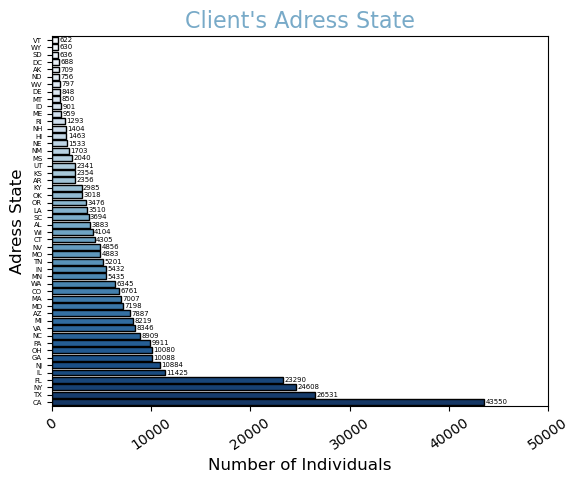

In [22]:
#Bar Graph State provided by the borrower in the loan application:
order_counts = train['addr_state'].value_counts().sort_values().index #Order the count values.
ax7=sns.countplot(y = 'addr_state', data = train, order = order_counts, edgecolor='black', palette="Blues")

plt.title("Client's Adress State", size=16, color='#78AAC8')
plt.xticks(rotation=35)
plt.yticks(fontsize=5)

plt.ylabel('Adress State',size=12)
plt.xlabel('Number of Individuals',size=12)
ax7.bar_label(ax7.containers[0], size=5 ,padding=1) 
ax7.set_xlim(right=50000)

plt.show()

First quartile is 8275.0
Third quartile is 20800.0
Maximum is 40000
Minimum is 1000


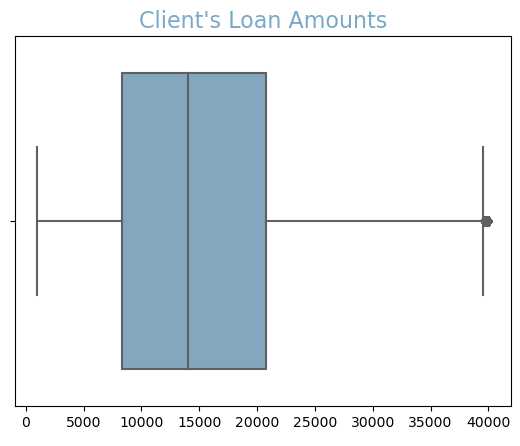

In [23]:
#Box-plot of Loan Amounts - to have idea of the outliers:
sns.boxplot(x='loan_amnt', data = train, color='#78AAC8')
plt.title("Client's Loan Amounts", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train['loan_amnt'], [75 ,25]) #Defining the quartiles from Loans.
print('First quartile is '+ str(q1))
print('Third quartile is '+ str(q3))
print('Maximum is '+str(max(train['loan_amnt']))) #Maximum Value of the Loans Amounts.
print('Minimum is '+str(min(train['loan_amnt']))) #Minimum Value of the Loans Amounts.

First quartile is 5783.21854
Third quartile is 18592.573819999998
Maximum is 59808.26209
Minimum is 0.0


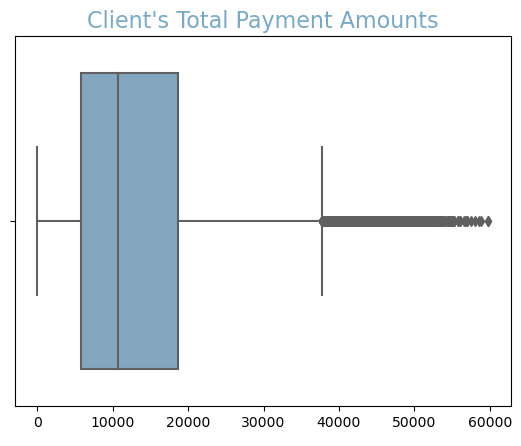

In [24]:
#Box-plot of Client's Total Payment Loan Amounts:
sns.boxplot(x='total_pymnt', data = train, color='#78AAC8')
plt.title("Client's Total Payment Amounts", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train['total_pymnt'], [75 ,25])
print('First quartile is '+ str(q1))
print('Third quartile is '+ str(q3))
print('Maximum is '+str(max(train['total_pymnt'])))
print('Minimum is '+str(min(train['total_pymnt'])))

First quartile is 5515.75
Third quartile is 19085.0
Maximum is 1044210
Minimum is 0


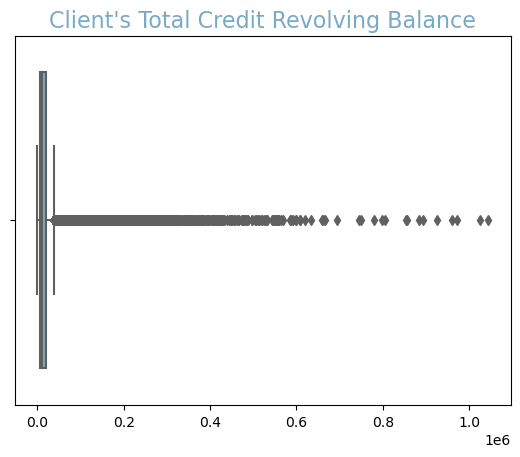

In [25]:
#Box-plot of Client's Total Credit Revolving Balance:
sns.boxplot(x='revol_bal', data = train, color='#78AAC8')
plt.title("Client's Total Credit Revolving Balance", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train['revol_bal'], [75 ,25])
print('First quartile is '+ str(q1))
print('Third quartile is '+ str(q3))
print('Maximum is '+str(max(train['revol_bal'])))
print('Minimum is '+str(min(train['revol_bal'])))

 <a class="anchor" id="preparation">

# 3. Data Preprocessing

</a>

- 3.1 Data Preparation. <br>
- 3.2 Data Cleaning. <br>
- 3.3 Feature Engineering. <br>
- 3.4 Scaling Data. <br>

<a class="anchor" id="Preprocessing">

 # 3.1  Data Preparation

</a>

- 3.1.1 To make copies from the original dataset. <br>
- 3.1.2 To drop columns. <br>
- 3.1.3 Creating & Transforming into New columns. <br>


#### 3.1.1 To make copies from the original dataset.

In [26]:
#We will create a copy of the dataset for we starting to work on it. And we will work on the copy:
train_f = train.copy()
train_f.head() # table from our dataset with the first 5 rows.

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,loan_status,risk
0,1,2500,2500,2500.0,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,debt_consolidation,CA,30.46,0,Jan-12,0.0,11,1,15603,37.0,19,0.0,30026.442500,Non-Default,0
1,2,30000,30000,30000.0,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-18,credit_card,OH,50.53,0,Jun-09,0.0,18,0,34971,64.5,37,0.0,40856.678960,Non-Default,0
2,3,5000,5000,5000.0,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,credit_card,WA,18.92,0,Feb-99,0.0,9,0,25416,29.9,19,0.0,20215.792430,Non-Default,0
3,4,4000,4000,4000.0,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-18,credit_card,TX,4.64,0,Dec-03,0.0,12,0,4472,15.3,25,0.0,4549.217149,Non-Default,0
4,5,30000,30000,30000.0,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-18,credit_card,MA,12.37,0,Oct-97,0.0,21,0,36812,65.7,37,0.0,8735.148975,Non-Default,0


#### 3.1.2 To drop columns.

In [27]:
# Drop Columns from dataset that we believe that will not be worth use, for our analysis:
train_f = train_f.drop(columns='id') 
train_f = train_f.drop(columns='total_acc') 
train_f = train_f.drop(columns='open_acc') 
train_f = train_f.drop(columns='inq_last_6mths') 
train_f = train_f.drop(columns='funded_amnt_inv') 
train_f = train_f.drop(columns='out_prncp')
train_f = train_f.drop(columns='revol_util')
train_f = train_f.drop(columns='pub_rec')
train_f = train_f.drop(columns='issue_d')
train_f = train_f.drop(columns='earliest_cr_line')
train_f = train_f.drop(columns='risk')

train_f.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status
0,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,Not Verified,debt_consolidation,CA,30.46,0,15603,30026.442500,Non-Default
1,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,credit_card,OH,50.53,0,34971,40856.678960,Non-Default
2,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,Source Verified,credit_card,WA,18.92,0,25416,20215.792430,Non-Default
3,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,credit_card,TX,4.64,0,4472,4549.217149,Non-Default
4,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,credit_card,MA,12.37,0,36812,8735.148975,Non-Default


#### 3.1.3 Creating & Transforming into New columns.


In [28]:
#Creating a New Column for understand the Payment Progress of the Client Loans.
train_f['Payment Progress']=train_f['funded_amnt']/train_f['total_pymnt']
train_f.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
0,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,Not Verified,debt_consolidation,CA,30.46,0,15603,30026.442500,Non-Default,0.083260
1,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,credit_card,OH,50.53,0,34971,40856.678960,Non-Default,0.734274
2,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,Source Verified,credit_card,WA,18.92,0,25416,20215.792430,Non-Default,0.247331
3,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,credit_card,TX,4.64,0,4472,4549.217149,Non-Default,0.879272
4,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,credit_card,MA,12.37,0,36812,8735.148975,Non-Default,3.434400


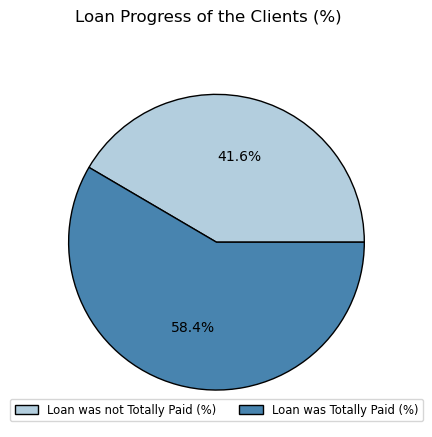

In [29]:
#Pie-Chart Loan Progress of the Clients %:

# Condition for Filter the when the Payment is lower than 1 or higher or equal 1:
lower_1 = train_f[train_f['Payment Progress'] < 1] # Their Loan was not Totally Paid.
greater_1 = train_f[train_f['Payment Progress'] >1 ] # Their Loan was Totally Paid.

#Colours for the Pie Chart Graph
colors = ['#B3CEDE', '#4884AF']
sizes = [len(lower_1), len(greater_1)] # All the values that are not greater than 1, and the values
                                            #that are greater or equal to 1.

    #Creating the Pie Chart according the sizes values, the colours that we select before, the respective percentages value
        #with the format number, and the put a border in pie chat.
ax7= plt.pie(sizes, colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.suptitle('Loan Progress of the Clients (%)', fontsize='large')  # Title at upper center
plt.legend(['Loan was not Totally Paid (%)','Loan was Totally Paid (%)'],loc='lower center',ncol=2, fontsize='small') #ncol= organizes the
                                                                                                    # the legend of the labels.

<a class="anchor" id="Cleaning">
    
# 3.2 Data Cleaning 


</a>


- 3.2.1 To check missing values. <br>
- 3.2.2 To fill in missing values. (quantitative = mean and categorical= mode). <br>
- 3.2.3 Coeherence Checking. <br>
- 3.2.4 To detect and remove outliers. <br>
- 3.2.5 Create Dummies for Categorical Variables. <br>
- 3.2.6 Scaling Variables. <br>

#### 3.2.1 To check missing values.

In [30]:
# We can understand according the shape of our data, the absolute of the missing values (NA Values).
train_f.isna().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
emp_title              29565
emp_length             22615
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
addr_state                 0
dti                      148
delinq_2yrs                0
revol_bal                  0
total_pymnt                0
loan_status                0
Payment Progress           0
dtype: int64

In [31]:
# We can understand according the shape of our data, the percentage of the missing values (NA Values).

# Sum of all mising values for each different categorie/ all values of dataset.
train_f.isna().sum()/len(train_f)*100

loan_amnt              0.000000
funded_amnt            0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
emp_title              9.515487
emp_length             7.278632
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.047634
delinq_2yrs            0.000000
revol_bal              0.000000
total_pymnt            0.000000
loan_status            0.000000
Payment Progress       0.000000
dtype: float64

#### 3.2.2 To fill in missing values (quantitative = mean and categorical= mode).

In [32]:
#So basically from all the columns from train_f that are object, will fill in that respective column with the mode.
# and from train_f that are integer, will fill in that respective column with their mean from the column.

object_columns = train_f.select_dtypes(include='object').columns.tolist() # Selecting only categorical columns from our dataset.
numeric_columns = train_f.select_dtypes(include=['int', 'float']).columns.tolist() # Selecting only numeric columns from our dataset.

# Fill missing values in categorical type columns with their respective modes
for column in object_columns:
    mode_value = train_f[column].mode()[0]  # Calculate mode for each column, ensuring only 1 mode picked.
    train_f[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

# Fill missing values in numeric columns with their respective means
for column in numeric_columns:
    mean_value = train_f[column].mean()  # Calculate mean for each column
    train_f[column].fillna(mean_value, inplace=True)  # Fill missing values with mean

train_f

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
0,2500,2500,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,Not Verified,debt_consolidation,CA,30.46,0,15603,30026.442500,Non-Default,0.083260
1,30000,30000,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,credit_card,OH,50.53,0,34971,40856.678960,Non-Default,0.734274
2,5000,5000,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,Source Verified,credit_card,WA,18.92,0,25416,20215.792430,Non-Default,0.247331
3,4000,4000,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,credit_card,TX,4.64,0,4472,4549.217149,Non-Default,0.879272
4,30000,30000,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,credit_card,MA,12.37,0,36812,8735.148975,Non-Default,3.434400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310699,25000,25000,36 months,16.99,891.20,D,Analyst,2 years,MORTGAGE,90000.0,Not Verified,moving,MD,3.19,3,1946,6201.430000,Default,4.031328
310700,24825,24825,36 months,16.55,879.53,D,DENTIST,1 year,RENT,252000.0,Source Verified,debt_consolidation,TN,24.26,0,15745,17769.660000,Default,1.397044
310701,19650,19650,60 months,13.33,450.43,C,Director,10+ years,OWN,95000.0,Verified,debt_consolidation,NC,18.56,0,34256,15088.780000,Default,1.302292
310702,31200,31200,60 months,19.99,826.44,E,Certified Occupational Therapy Assistant,< 1 year,OWN,65000.0,Source Verified,debt_consolidation,CA,20.62,0,7261,18602.730000,Default,1.677173


In [33]:
# We can understand according the shape of our data, the absolute of the missing values (NA Values).
train_f.isna().sum()

loan_amnt              0
funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
revol_bal              0
total_pymnt            0
loan_status            0
Payment Progress       0
dtype: int64

#### 3.2.3 Coeherence Checking.


In [34]:
# Put Verified and Source Verified togheter in verification_status.
train_f['verification_status'].replace('Source Verified', 'Verified', inplace=True)

# We must take care of data as well, the decimal houses in Loan Amounts, Annual Income, and total_pymnt. 
train_f['installment'] = train_f['installment'].round(2) #Round money with 2 decimal houses.
train_f['annual_inc'] = train_f['annual_inc'].round(2) #Round money with 2 decimal houses.
train_f['total_pymnt'] = train_f['total_pymnt'].round(2) #Round money with 2 decimal houses.
train_f['loan_amnt'] = train_f['loan_amnt'].round(2) #Round money with 2 decimal houses.
train_f['funded_amnt'] = train_f['funded_amnt'].round(2) #Round money with 2 decimal houses.
train_f['int_rate'] = train_f['int_rate'].round(2) #Round Percentage with 2 decimal houses.
train_f['Payment Progress'] = train_f['Payment Progress'].round(2) #Round percentage with 2 decimal houses.
train_f['revol_bal'] = train_f['revol_bal'].round(2) #Round money with 2 decimal houses.
train_f['dti'] = train_f['dti'].round(2) #Round percentage with 2 decimal houses.


# Remove the + in the variable Client Employment Lenght.
train_f['emp_length'] = train_f['emp_length'].str.replace('+', '')
# This will replace the whole string ‘less than 1 year’ with the string ‘0’
train_f['emp_length'] = train_f['emp_length'].str.replace('< 1', str(0))
# Remove the years in the variable Client Employment Lenght.
train_f['emp_length'] = train_f['emp_length'].str.replace('years', '')
# Remove the 'year in the variable Client Employment Lenght.
train_f['emp_length'] = train_f['emp_length'].str.replace('year', '') 
# Remove the months in the variable Term and let just only 36.
train_f['term'] = train_f['term'].str.replace("36 months", '36')
# Remove the months in the variable Term and let just only 60.
train_f['term'] = train_f['term'].str.replace("60 months", '60')

train_f.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
0,2500,2500,36,13.56,84.92,C,Chef,10,RENT,55000.0,Not Verified,debt_consolidation,CA,30.46,0,15603,30026.44,Non-Default,0.08
1,30000,30000,60,18.94,777.23,D,Postmaster,10,MORTGAGE,90000.0,Verified,credit_card,OH,50.53,0,34971,40856.68,Non-Default,0.73
2,5000,5000,36,17.97,180.69,D,Administrative,6,MORTGAGE,59280.0,Verified,credit_card,WA,18.92,0,25416,20215.79,Non-Default,0.25
3,4000,4000,36,18.94,146.51,D,IT Supervisor,10,MORTGAGE,92000.0,Verified,credit_card,TX,4.64,0,4472,4549.22,Non-Default,0.88
4,30000,30000,60,16.14,731.78,C,Mechanic,10,MORTGAGE,57250.0,Not Verified,credit_card,MA,12.37,0,36812,8735.15,Non-Default,3.43


#### 3.2.4 To detect and remove outliers.

In [35]:
#The method that we will use for treat the outliers. Is to change by their median and Winsorization, because if we remove them
#we will lose information. We can not change by their mean because the value is already affected by the outliers, so we will
#just replace by their median in the variables that we have low outliers and regarding, where we have more than 5% outliers 
#we will use Winsorization because is not the best approach use the median, because the median is affect as well by the outliers
#so we believe replacing by the Winsorization, is the best approach because will replace that specific outliers from the values
#that are closest to the q3 and q1 and is not affecting the scale of the variable. We only will apply the Winsorization
#in the variable total payment, dti and revol bal need be cared, because they have excessive % values of outliers.

In [36]:
train_f.describe() # For we know the median of our variables (50%).
#Statistics description from all variables.

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,revol_bal,total_pymnt,Payment Progress
count,310704.000000,310704.000000,310704.000000,310704.000000,3.107040e+05,310704.000000,310704.000000,3.107040e+05,310704.000000,310704.00
mean,15518.606133,15518.606133,12.565801,452.838937,8.053998e+04,19.020775,0.338029,1.605273e+04,13430.483431,inf
std,9196.532109,9196.532109,4.702061,264.514016,9.286294e+04,12.336613,0.921206,2.322824e+04,10010.944737,NaN
min,1000.000000,1000.000000,5.320000,14.770000,0.000000e+00,-1.000000,0.000000,0.000000e+00,0.000000,0.02
25%,8275.000000,8275.000000,8.810000,259.420000,4.800000e+04,12.070000,0.000000,5.515750e+03,5783.215000,0.61
50%,14000.000000,14000.000000,11.990000,387.550000,6.720000e+04,18.200000,0.000000,1.059000e+04,10741.860000,1.26
75%,20800.000000,20800.000000,15.310000,602.950000,9.500000e+04,25.080000,0.000000,1.908500e+04,18592.572500,2.63
max,40000.000000,40000.000000,30.990000,1618.240000,9.757200e+06,999.000000,21.000000,1.044210e+06,59808.260000,inf


#### 3.2.4.1 Treating the Outliers (loan_amnt Variable)


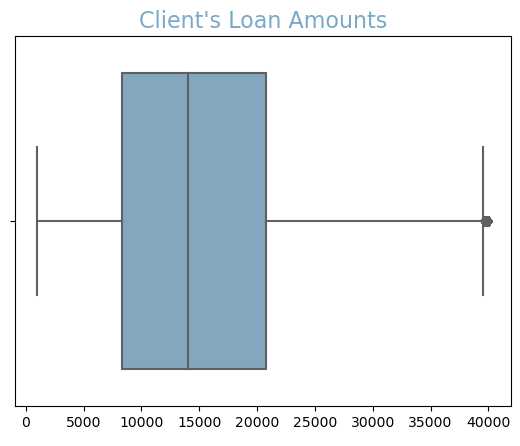

In [37]:
#Box-plot of Client's Amounts:
sns.boxplot(x='loan_amnt', data = train_f, color='#78AAC8')
plt.title("Client's Loan Amounts", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['loan_amnt'], [75 ,25])

In [38]:
#Vizualization of how many outliers we have in Loan Clients:

train_f.loc[train_f['loan_amnt']>35000]
#we have 5519 outliers in 310704 rows (1.77%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
55,40000,40000,60,14.47,940.51,C,Teacher,0,MORTGAGE,500000.0,Verified,debt_consolidation,MD,3.40,0,908,21505.78,Non-Default,1.86
70,36000,36000,60,17.97,913.58,D,Pharmacist,9,RENT,160000.0,Verified,debt_consolidation,FL,7.92,0,0,4510.91,Non-Default,7.98
152,40000,40000,60,16.14,975.71,C,Assistant to the Treasurer (Payroll),0,MORTGAGE,45000.0,Verified,credit_card,VT,5.06,0,25262,40226.31,Non-Default,0.99
197,40000,40000,60,11.31,875.90,B,Teacher,0,MORTGAGE,136000.0,Not Verified,debt_consolidation,FL,29.89,1,11071,14266.77,Non-Default,2.80
299,36000,36000,60,11.80,797.17,B,Teacher,10,MORTGAGE,90000.0,Verified,debt_consolidation,FL,36.22,0,39104,16866.68,Non-Default,2.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137839,40000,40000,36,8.39,1260.67,B,Director of Commercialization,4,MORTGAGE,139453.0,Verified,home_improvement,SD,27.48,0,5870,5571.46,Non-Default,7.18
137923,40000,40000,36,7.89,1251.43,A,Electronics Engineer,10,MORTGAGE,143678.0,Verified,debt_consolidation,NJ,20.91,0,4530,11298.78,Non-Default,3.54
138172,40000,40000,36,6.49,1225.78,A,Senior Security Engineer,3,MORTGAGE,153000.0,Verified,debt_consolidation,NJ,11.37,0,2870,7013.95,Non-Default,5.70
138733,40000,40000,36,9.75,1286.00,B,Corporate Executive Chef,4,RENT,169500.0,Verified,debt_consolidation,CA,3.62,0,37224,42501.89,Non-Default,0.94


In [39]:
#Change the variable loan_amnt their all outliers from their respective median:
train_f.loc[(train_f['loan_amnt'] >= 35000), 'loan_amnt'] = 14000 #for we not change the datatype of variable.


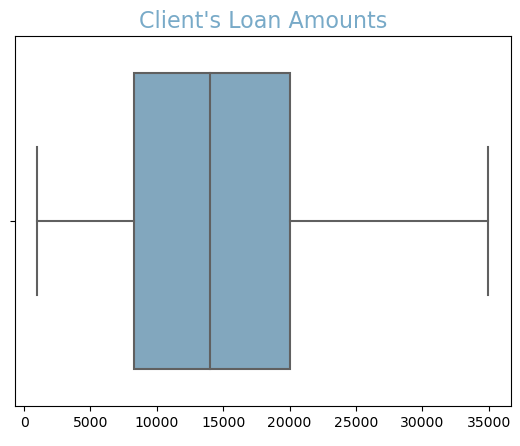

In [40]:
#Box-plot of Client's Amounts (Treated):
sns.boxplot(x='loan_amnt', data = train_f, color='#78AAC8')
plt.title("Client's Loan Amounts", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['loan_amnt'], [75 ,25])

#### 3.2.4.2 Treating the Outliers (funded_amnt Variable)


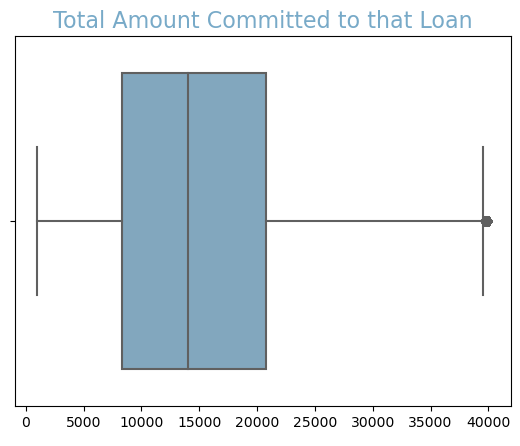

In [41]:
#Box-plot of Total Amount Committed to that Loan:
sns.boxplot(x='funded_amnt', data = train_f, color='#78AAC8')
plt.title("Total Amount Committed to that Loan", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['funded_amnt'], [75 ,25])

In [42]:
#Vizualization of how many outliers we have in Funded_amnt:

train_f.loc[train_f['funded_amnt']>35000]
#we have 5519 outliers in 310704 rows (1.77%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
55,14000,40000,60,14.47,940.51,C,Teacher,0,MORTGAGE,500000.0,Verified,debt_consolidation,MD,3.40,0,908,21505.78,Non-Default,1.86
70,14000,36000,60,17.97,913.58,D,Pharmacist,9,RENT,160000.0,Verified,debt_consolidation,FL,7.92,0,0,4510.91,Non-Default,7.98
152,14000,40000,60,16.14,975.71,C,Assistant to the Treasurer (Payroll),0,MORTGAGE,45000.0,Verified,credit_card,VT,5.06,0,25262,40226.31,Non-Default,0.99
197,14000,40000,60,11.31,875.90,B,Teacher,0,MORTGAGE,136000.0,Not Verified,debt_consolidation,FL,29.89,1,11071,14266.77,Non-Default,2.80
299,14000,36000,60,11.80,797.17,B,Teacher,10,MORTGAGE,90000.0,Verified,debt_consolidation,FL,36.22,0,39104,16866.68,Non-Default,2.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137839,14000,40000,36,8.39,1260.67,B,Director of Commercialization,4,MORTGAGE,139453.0,Verified,home_improvement,SD,27.48,0,5870,5571.46,Non-Default,7.18
137923,14000,40000,36,7.89,1251.43,A,Electronics Engineer,10,MORTGAGE,143678.0,Verified,debt_consolidation,NJ,20.91,0,4530,11298.78,Non-Default,3.54
138172,14000,40000,36,6.49,1225.78,A,Senior Security Engineer,3,MORTGAGE,153000.0,Verified,debt_consolidation,NJ,11.37,0,2870,7013.95,Non-Default,5.70
138733,14000,40000,36,9.75,1286.00,B,Corporate Executive Chef,4,RENT,169500.0,Verified,debt_consolidation,CA,3.62,0,37224,42501.89,Non-Default,0.94


In [43]:
#Change the variable loan_amnt their all outliers from their respective median:
train_f.loc[(train_f['funded_amnt'] >= 35000), 'funded_amnt'] = 14000 #for we not change the datatype of variable.

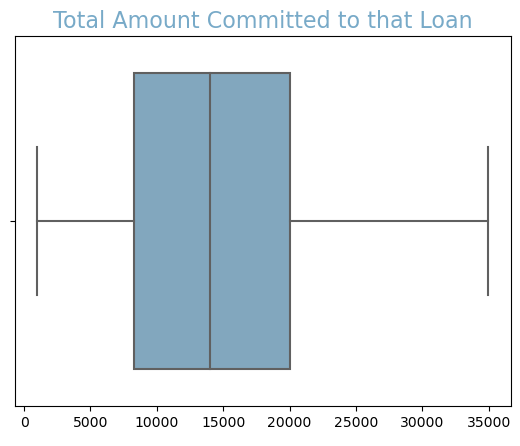

In [44]:
#Box-plot of Total Amount Committed to that Loan:
sns.boxplot(x='funded_amnt', data = train_f, color='#78AAC8')
plt.title("Total Amount Committed to that Loan", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['funded_amnt'], [75 ,25])

#### 3.2.4.3 Treating the Outliers (installment Variable)


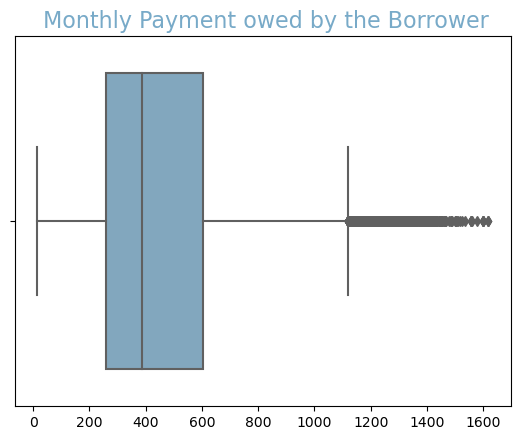

In [45]:
#Box-plot of Total Amount Committed to that Loan:
sns.boxplot(x='installment', data = train_f, color='#78AAC8')
plt.title(" Monthly Payment owed by the Borrower", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

#iqr = q3-q1
#qmax= q3 + 1.5*iqr
#print('Upper bound is '+ str(qmax)) # The Outliers is above of 1118.

q3, q1 = np.percentile(train_f['installment'], [75 ,25])

In [46]:
#Vizualization of how many outliers we have in Installment:

train_f.loc[train_f['installment']>1118]
#we have 8110 outliers in 310704 rows (2.61%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
73,14000,14000,36,12.98,1178.96,B,Anti Money Laundering Compliance Manager,2,RENT,112000.0,Verified,credit_card,NY,9.85,0,34313,20005.57,Non-Default,1.75
100,30000,30000,36,22.35,1151.16,D,Supervisor,5,MORTGAGE,100000.0,Verified,credit_card,VA,26.10,0,17252,10588.19,Non-Default,2.83
177,14000,14000,36,14.47,1204.23,C,Staff Physician,8,MORTGAGE,360000.0,Verified,debt_consolidation,LA,5.93,0,214,18139.33,Non-Default,1.93
337,14000,14000,36,8.19,1256.97,A,Handbags Manager,9,MORTGAGE,55000.0,Not Verified,major_purchase,MN,9.11,0,78803,15017.07,Non-Default,2.66
382,14000,14000,36,16.14,1232.92,C,Head of Operarions,5,RENT,125500.0,Verified,debt_consolidation,CO,23.38,0,7122,12136.35,Non-Default,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310541,14000,14000,36,16.55,1240.03,D,Software Analyst,2,RENT,130000.0,Verified,credit_card,TN,26.69,0,11579,13625.57,Default,2.57
310598,14000,14000,36,14.65,1207.30,C,Photographer,10,RENT,267000.0,Verified,debt_consolidation,FL,7.07,0,6202,9434.47,Default,3.71
310619,14000,14000,36,14.65,1207.30,C,Operation Manager,4,RENT,300000.0,Verified,credit_card,MD,14.24,4,17696,25710.98,Default,1.36
310628,14000,14000,36,15.61,1223.77,D,Teacher,10,MORTGAGE,90000.0,Verified,debt_consolidation,MD,32.00,0,20540,10760.11,Default,3.25


In [47]:
#Change the variable installment their all outliers:
Winsorization_inst = winsorize(train_f['installment'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

Text(0.5, 0, ' ')

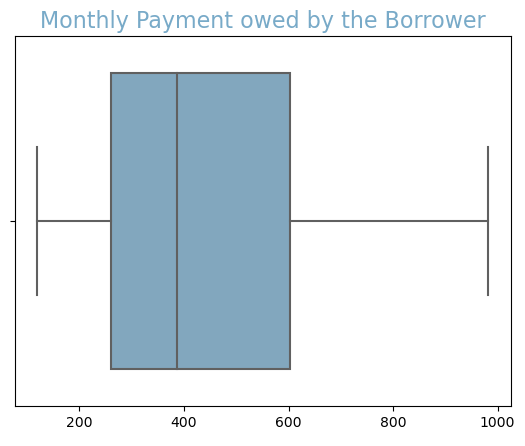

In [48]:
#Implementing the new Clients Loan Amounts:
train_f['installment'] = Winsorization_inst
sns.boxplot(x='installment', data = train_f, color='#78AAC8')
plt.title("Monthly Payment owed by the Borrower", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

#### 3.2.4.4 Treating the Outliers (annual_inc Variable)


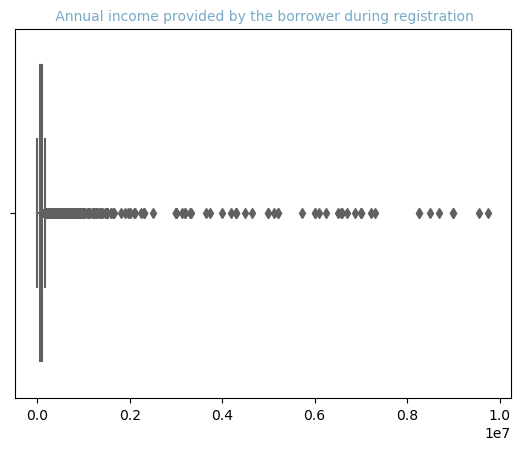

In [49]:
#Box-plot of Total Amount Committed to that Loan:
sns.boxplot(x='annual_inc', data = train_f, color='#78AAC8')
plt.title(" Annual income provided by the borrower during registration", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

#iqr = q3-q1
#qmax= q3 + 1.5*iqr
#print('Upper bound is '+ str(qmax)) # The Outliers is above of 165500.

q3, q1 = np.percentile(train_f['annual_inc'], [75 ,25])



In [50]:
#Vizualization of how many outliers we have in annual_inc:

train_f.loc[train_f['annual_inc']>165500]
#we have 15849 outliers in 310704 rows (5.10%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
9,6000,6000,36,14.47,206.44,C,Teacher,0,OWN,300000.0,Not Verified,credit_card,MI,24.95,0,2696,2700.84,Non-Default,2.22
39,25000,25000,60,27.27,767.43,E,Business Intelligence Engineer,5,MORTGAGE,171000.0,Not Verified,credit_card,MN,14.33,0,4382,4557.07,Non-Default,5.49
55,14000,14000,60,14.47,940.51,C,Teacher,0,MORTGAGE,500000.0,Verified,debt_consolidation,MD,3.40,0,908,21505.78,Non-Default,1.86
98,16000,16000,60,20.89,431.87,D,Regional Manager,10,RENT,200000.0,Verified,debt_consolidation,AZ,23.84,0,5464,15012.44,Non-Default,1.07
114,11000,11000,36,16.14,387.49,C,Senior Area Sales Manager,3,MORTGAGE,240000.0,Not Verified,debt_consolidation,FL,17.68,0,10668,7160.81,Non-Default,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310584,14000,14000,60,11.53,770.27,B,Chief Executive Officer,10,OWN,700000.0,Verified,debt_consolidation,TX,6.18,0,8628,31755.86,Default,1.10
310598,14000,14000,36,14.65,982.14,C,Photographer,10,RENT,267000.0,Verified,debt_consolidation,FL,7.07,0,6202,9434.47,Default,3.71
310619,14000,14000,36,14.65,982.14,C,Operation Manager,4,RENT,300000.0,Verified,credit_card,MD,14.24,4,17696,25710.98,Default,1.36
310627,24000,24000,36,7.89,750.86,A,External Wholesaler,9,MORTGAGE,265000.0,Verified,debt_consolidation,KS,16.59,0,24238,19731.62,Default,1.22


In [51]:
#Change the variable annual_inc their all outliers:
Winsorization_annual_inc = winsorize(train_f['annual_inc'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

Text(0.5, 0, ' ')

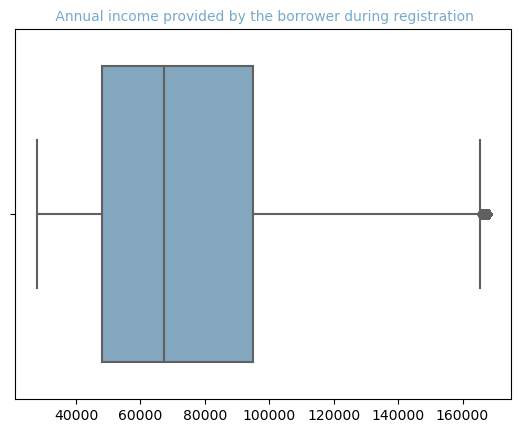

In [52]:
#Implementing the new variable annual_inc:
train_f['annual_inc'] = Winsorization_annual_inc
sns.boxplot(x='annual_inc', data = train_f, color='#78AAC8')
plt.title(" Annual income provided by the borrower during registration", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

#### 3.2.4.5 Treating the Outliers (dti Variable)


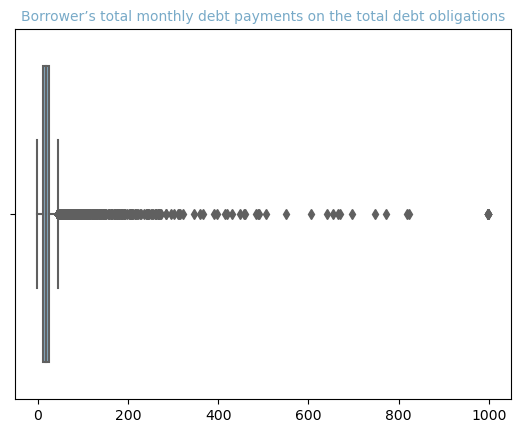

In [53]:
#Box-plot of Total DTI Ratio:
sns.boxplot(x='dti', data = train_f, color='#78AAC8')
plt.title("Borrower’s total monthly debt payments on the total debt obligations", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

#iqr = q3-q1
#qmax= q3 + 1.5*iqr
#print('Upper bound is '+ str(qmax)) # The Outliers is above of 45 and we have a negative number.

q3, q1 = np.percentile(train_f['dti'], [75 ,25])

In [54]:
#Vizualization of how many outliers we have in dti:

train_f.loc[train_f['dti']>45]
#we have 2022 outliers in 310704 rows (0.65%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
1,30000,30000,60,18.94,777.23,D,Postmaster,10,MORTGAGE,90000.0,Verified,credit_card,OH,50.53,0,34971,40856.68,Non-Default,0.73
69,12000,12000,36,11.80,397.43,B,Transportation Manager,10,RENT,79365.0,Verified,home_improvement,WA,49.23,0,37235,12630.27,Non-Default,0.95
156,12000,12000,36,16.14,422.72,C,Sales Account Manager,4,RENT,70000.0,Verified,debt_consolidation,UT,78.45,1,1831,7044.68,Non-Default,1.70
386,14000,14000,36,8.19,982.14,A,Branch Manager,2,MORTGAGE,100000.0,Not Verified,debt_consolidation,CA,79.36,0,4640,24378.89,Non-Default,1.64
409,20000,20000,36,8.19,628.49,A,Chef,7,RENT,55000.0,Verified,debt_consolidation,AZ,48.34,0,23447,40561.07,Non-Default,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309794,28000,28000,60,17.57,704.49,D,Engineer,10,MORTGAGE,111153.0,Verified,debt_consolidation,TN,49.01,0,27982,7385.86,Default,3.79
309983,10625,10625,36,16.55,376.44,D,Store Planner,2,RENT,55000.0,Verified,major_purchase,MN,46.71,0,24156,5323.52,Default,2.00
310020,7000,7000,36,9.17,223.16,B,Service Desk Lead,4,RENT,100000.0,Verified,debt_consolidation,FL,45.40,0,14556,737.16,Default,9.50
310098,32025,32025,36,13.67,982.14,C,Architect,10,MORTGAGE,138000.0,Verified,debt_consolidation,CA,47.16,0,41414,1423.62,Default,22.50


In [55]:
#Change the variable dti their all outliers:
Winsorization_dti = winsorize(train_f['dti'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

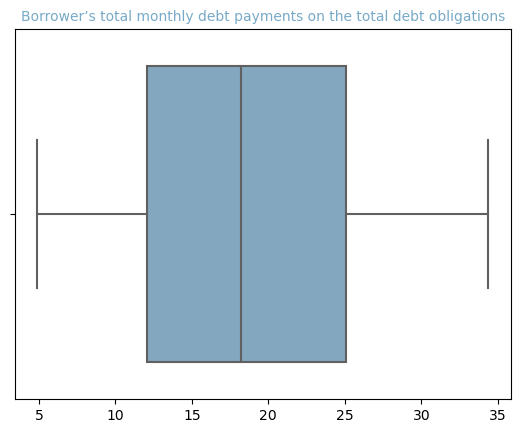

In [56]:
#Box-plot of Total DTI Ratio:
train_f['dti'] = Winsorization_dti
sns.boxplot(x='dti', data = train_f, color='#78AAC8')
plt.title("Borrower’s total monthly debt payments on the total debt obligations", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['dti'], [75 ,25])

#### 3.2.4.6 Treating the Outliers (revol_bal Variable)


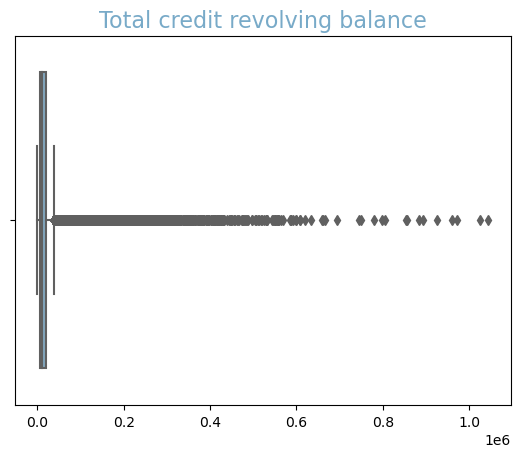

In [57]:
#Box-plot of Total credit revolving balance:
sns.boxplot(x='revol_bal', data = train_f, color='#78AAC8')
plt.title("Total credit revolving balance", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

#iqr = q3-q1
#qmax= q3 + 1.5*iqr
#print('Upper bound is '+ str(qmax)) # The Outliers is above of 39438.875 and we have a negative number.

q3, q1 = np.percentile(train_f['revol_bal'], [75 ,25])

In [58]:
#Vizualization of how many outliers we have in revol_bal:

train_f.loc[train_f['revol_bal']>39438]
#we have 20368 outliers in 310704 rows (6.55%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
12,11200,11200,36,8.19,351.95,A,Job Coach Supervisor,10,MORTGAGE,65000.0,Not Verified,other,CA,20.10,0,133414,8053.55,Non-Default,1.39
36,12000,12000,36,26.31,485.48,E,Teacher,5,OWN,28000.0,Not Verified,credit_card,CO,22.49,0,104204,16054.60,Non-Default,0.75
82,24000,24000,36,19.92,890.95,D,overnight supervisor,7,RENT,30000.0,Verified,debt_consolidation,LA,21.55,0,63661,40452.04,Non-Default,0.59
108,20000,20000,60,16.14,487.86,C,Sales,10,MORTGAGE,30000.0,Verified,debt_consolidation,OR,22.18,0,52631,16240.72,Non-Default,1.23
124,3000,3000,36,10.72,119.56,B,Teacher,10,MORTGAGE,30000.0,Not Verified,credit_card,IL,34.38,0,50542,16008.75,Non-Default,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310677,4625,4625,36,19.19,169.98,E,Data Entry Clerk,0,RENT,28000.0,Verified,credit_card,NY,22.56,1,55530,15461.37,Default,0.30
310682,4600,4600,36,17.86,165.98,D,Ironner,10,MORTGAGE,28000.0,Verified,debt_consolidation,CA,30.14,1,41895,33292.36,Default,0.14
310683,15000,15000,60,18.25,382.95,E,Sales Manager,7,RENT,90000.0,Verified,credit_card,MD,32.21,0,57520,19009.17,Default,0.79
310687,19200,19200,36,9.99,619.44,B,Machine Operator,5,MORTGAGE,70000.0,Verified,debt_consolidation,TX,34.38,0,53523,26859.59,Default,0.71


In [59]:
#Change the variable revol_bal their all outliers:
Winsorization_rev = winsorize(train_f['revol_bal'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

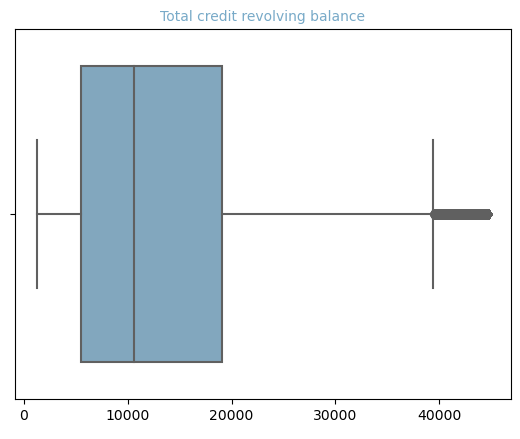

In [60]:
#Box-plot of Total credit revolving balance:
train_f['revol_bal'] = Winsorization_rev
sns.boxplot(x='revol_bal', data = train_f, color='#78AAC8')
plt.title("Total credit revolving balance", size=10, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['revol_bal'], [75 ,25])

#### 3.2.4.7 Treating the Outliers (total_pymnt Variable)


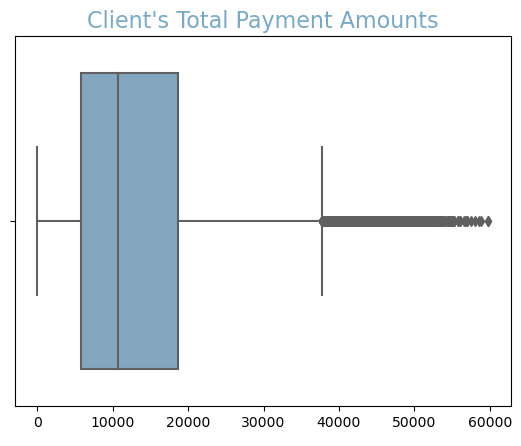

In [61]:
#Box-plot of Client's Total Payment Loan Amounts:
sns.boxplot(x='total_pymnt', data = train_f, color='#78AAC8')
plt.title("Client's Total Payment Amounts", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

q3, q1 = np.percentile(train_f['total_pymnt'], [75 ,25])

In [62]:
#Vizualization of how many outliers we have in Funded Amount Investment Loan Clients:
q3, q1 = np.percentile(train_f['total_pymnt'], [75 ,25])

#iqr = q3-q1
#qmax= q3 + 1.5*iqr
#print('Upper bound is '+ str(qmax)) #We this value we understand the upper limit for we start delete the outliers (37806.60).
train_f.loc[train_f['total_pymnt']>37806.60] # We only see the rows with outliers above of 37806.60 in loans amounts.
#we have 10200 outliers in 310704 rows (3.28%) we dont want to remove for we do not lose potential Information.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status,Payment Progress
1,30000,30000,60,18.94,777.23,D,Postmaster,10,MORTGAGE,90000.0,Verified,credit_card,OH,34.38,0,34971,40856.68,Non-Default,0.73
65,29450,29450,36,8.19,925.44,A,General Manager,10,MORTGAGE,161000.0,Verified,credit_card,TX,29.22,0,24941,40017.04,Non-Default,0.74
82,24000,24000,36,19.92,890.95,D,overnight supervisor,7,RENT,30000.0,Verified,debt_consolidation,LA,21.55,0,44720,40452.04,Non-Default,0.59
88,7500,7500,36,16.14,264.20,C,lab tech,10,OWN,50000.0,Verified,major_purchase,CA,5.77,0,11998,40215.36,Non-Default,0.19
93,16000,16000,36,15.02,554.81,C,Plumber,4,OWN,50000.0,Verified,small_business,FL,5.79,0,1311,40041.25,Non-Default,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309358,19200,19200,36,9.17,612.08,B,Manager,1,OWN,100000.0,Verified,debt_consolidation,FL,4.98,0,44720,38246.40,Default,0.50
310031,17950,17950,60,22.99,505.92,F,Teacher,10,MORTGAGE,44900.0,Verified,debt_consolidation,CA,29.56,0,44720,37923.51,Default,0.47
310365,7200,7200,36,9.99,232.29,B,Designer,0,RENT,63500.0,Verified,major_purchase,NY,4.90,0,34812,42488.17,Default,0.17
310374,3000,3000,36,17.86,119.56,D,Fraud Claims Representative,1,RENT,28000.0,Verified,debt_consolidation,NJ,6.16,0,44720,41704.65,Default,0.07


In [63]:
#Change the variable total_pymnt their all outliers:
Winsorization_total_pymt = winsorize(train_f['total_pymnt'],(0.05,0.05)) # does not change the scale.

#90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced
#by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value
#of the data at the 5th percentile.

Text(0.5, 0, ' ')

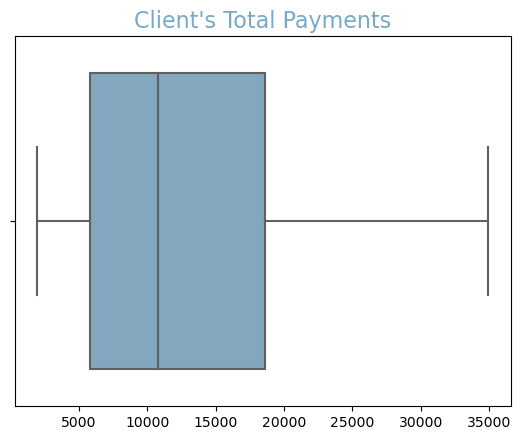

In [64]:
#Implementing the Client's Total Payment Loan Amounts:
train_f['total_pymnt'] = Winsorization_total_pymt
sns.boxplot(x='total_pymnt', data = train_f, color='#78AAC8')
plt.title("Client's Total Payments", size=16, color='#78AAC8')
plt.xlabel(' ',size=1)

#### 3.2.5 Create Dummies for Categorical Variables.

In [65]:
#Using the Label Encoder, we will transform our categorical variables into dummies for we could analyse the relationships
#with the quantitative variables and the categorical variables, because some algorithms only work with numerical variables.
label_encoder = preprocessing.LabelEncoder() #Have a order and transform the categorical variables into numerical.

train_f['term']= label_encoder.fit_transform(train_f['term']) 
train_f['grade']= label_encoder.fit_transform(train_f['grade']) 
train_f['emp_length']= label_encoder.fit_transform(train_f['emp_length']) 
train_f['home_ownership']= label_encoder.fit_transform(train_f['home_ownership']) 
train_f['verification_status']= label_encoder.fit_transform(train_f['verification_status']) 
train_f['purpose']= label_encoder.fit_transform(train_f['purpose']) 
train_f['addr_state']= label_encoder.fit_transform(train_f['addr_state']) 
train_f['loan_status']= label_encoder.fit_transform(train_f['loan_status'])
train_f['emp_title']= label_encoder.fit_transform(train_f['emp_title']) 
train_f = train_f.drop(columns='Payment Progress') #na Values

#### 3.2.6 Scaling Variables.

In [66]:
train_f.describe() # All data description and treated.

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status
count,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000,310704.000000
mean,14176.054863,14176.054863,0.304689,12.565801,446.987504,1.591260,49244.517068,3.392634,1.889602,76028.223346,0.655479,2.589371,22.393490,18.725411,0.338029,14119.295307,13223.086942,0.689882
std,7529.803210,7529.803210,0.460276,4.702061,242.209505,1.265338,25919.923919,2.635746,0.935819,37556.922813,0.475213,2.101278,14.674003,8.447806,0.921206,11627.311215,9321.675464,0.462543
min,1000.000000,1000.000000,0.000000,5.320000,119.560000,0.000000,0.000000,0.000000,0.000000,28000.000000,0.000000,0.000000,0.000000,4.900000,0.000000,1311.000000,1955.960000,0.000000
25%,8275.000000,8275.000000,0.000000,8.810000,259.420000,1.000000,26705.000000,2.000000,1.000000,48000.000000,0.000000,2.000000,9.000000,12.070000,0.000000,5515.750000,5783.215000,0.000000
50%,14000.000000,14000.000000,0.000000,11.990000,387.550000,1.000000,52446.000000,2.000000,2.000000,67200.000000,1.000000,2.000000,21.000000,18.200000,0.000000,10590.000000,10741.860000,1.000000
75%,20000.000000,20000.000000,1.000000,15.310000,602.950000,2.000000,73842.000000,5.000000,3.000000,95000.000000,1.000000,2.000000,34.000000,25.080000,0.000000,19085.000000,18592.572500,1.000000
max,34975.000000,34975.000000,1.000000,30.990000,982.140000,6.000000,91589.000000,10.000000,3.000000,168000.000000,1.000000,12.000000,49.000000,34.380000,21.000000,44720.000000,34936.850000,1.000000


In [67]:
#Do not run this code, because we will treat the data in front for each type train, validation and test. 
#If we treated 2 times, it will be unbalanced. Here, is only to prove that we know scale the data, and export for Afshin 
#professor that data was all tretated.

#X_train_c = train_f.drop('loan_status', axis = 1) # Goal is to scale all the variables from train, without target variable.
#y_train_c = train_f['loan_status'] # Goal is to scale only with the target variable.

#scaler = MinMaxScaler().fit(X_train_c)
#minmax_train_c = scaler.transform(X_train_c)

#X_train_c = pd.DataFrame(minmax_train_c, columns = X_train_c.columns, index=X_train_c.index)
#X_train_c

In [68]:
#Exporting the Data Treated (only for deliver, that this code is used):
#X_train_c.to_csv('Data Treated (train_validation_dataset).csv', index=None)

<a class="anchor" id="Cleaning">   

    
 # 4. Feature Selection


</a>

- 4.1 Univariate variables. <br>
- 4.2 Spearman & Pearson Correlation. <br>
- 4.3 ANOVA Test. <br>

#### 4.1 Univariate variables.

In [69]:
#Observing the Correlation graphs we must drop the loan_amnount, founded_amount, int_rate columns, because they are higly
#correlated, and the payment Progress because haves na values.
train_f = train_f.drop(columns='loan_amnt')
train_f = train_f.drop(columns='funded_amnt')
train_f = train_f.drop(columns='int_rate')

In [70]:
train_f.var()
#measures the spread or dispersion of data points around the mean.

term                   2.118542e-01
installment            5.866544e+04
grade                  1.601080e+00
emp_title              6.718425e+08
emp_length             6.947157e+00
home_ownership         8.757567e-01
annual_inc             1.410522e+09
verification_status    2.258270e-01
purpose                4.415369e+00
addr_state             2.153264e+02
dti                    7.136542e+01
delinq_2yrs            8.486201e-01
revol_bal              1.351944e+08
total_pymnt            8.689363e+07
loan_status            2.139456e-01
dtype: float64

#### 4.2  Pearson & Spearman Correlation.

In [71]:
#Pearson Correlation Table:
cor_pearson = train_f.corr(method='pearson')
cor_pearson

,term,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status
term,1.000000,0.143062,0.360513,-0.025193,0.012201,-0.096068,0.094428,-0.004060,0.004504,-0.002864,-0.001725,-0.000429,-0.001949,-0.012325,-0.025892
installment,0.143062,1.000000,0.092143,-0.022504,0.000638,-0.140112,0.457601,0.116008,0.000943,-0.002123,-0.007287,-0.000193,-0.000018,0.017217,0.041873
grade,0.360513,0.092143,1.000000,0.007051,0.011234,0.072925,-0.130153,0.213646,-0.002929,0.000258,0.008828,0.003257,0.006827,-0.018135,-0.054712
emp_title,-0.025193,-0.022504,0.007051,1.000000,-0.066391,-0.020935,-0.050049,-0.023530,-0.000184,0.000333,0.000970,-0.001240,-0.001875,-0.000207,0.004489
emp_length,0.012201,0.000638,0.011234,-0.066391,1.000000,-0.006716,0.008752,0.013123,-0.001667,0.001540,0.009259,0.002008,0.006630,-0.007456,-0.030169
home_ownership,-0.096068,-0.140112,0.072925,-0.020935,-0.006716,1.000000,-0.231609,0.044564,-0.002193,0.001169,0.001472,-0.001420,0.001559,-0.003604,-0.005639
annual_inc,0.094428,0.457601,-0.130153,-0.050049,0.008752,-0.231609,1.000000,0.000123,-0.000341,-0.002990,-0.006603,0.001634,0.001846,0.011905,0.026922
verification_status,-0.004060,0.116008,0.213646,-0.023530,0.013123,0.044564,0.000123,1.000000,-0.007821,0.001787,0.025653,0.009087,0.008117,-0.050415,-0.138640
purpose,0.004504,0.000943,-0.002929,-0.000184,-0.001667,-0.002193,-0.000341,-0.007821,1.000000,-0.006029,-0.077027,0.017846,-0.132325,-0.136793,-0.005408
addr_state,-0.002864,-0.002123,0.000258,0.000333,0.001540,0.001169,-0.002990,0.001787,-0.006029,1.000000,0.042519,0.015258,0.012062,0.003368,0.000863


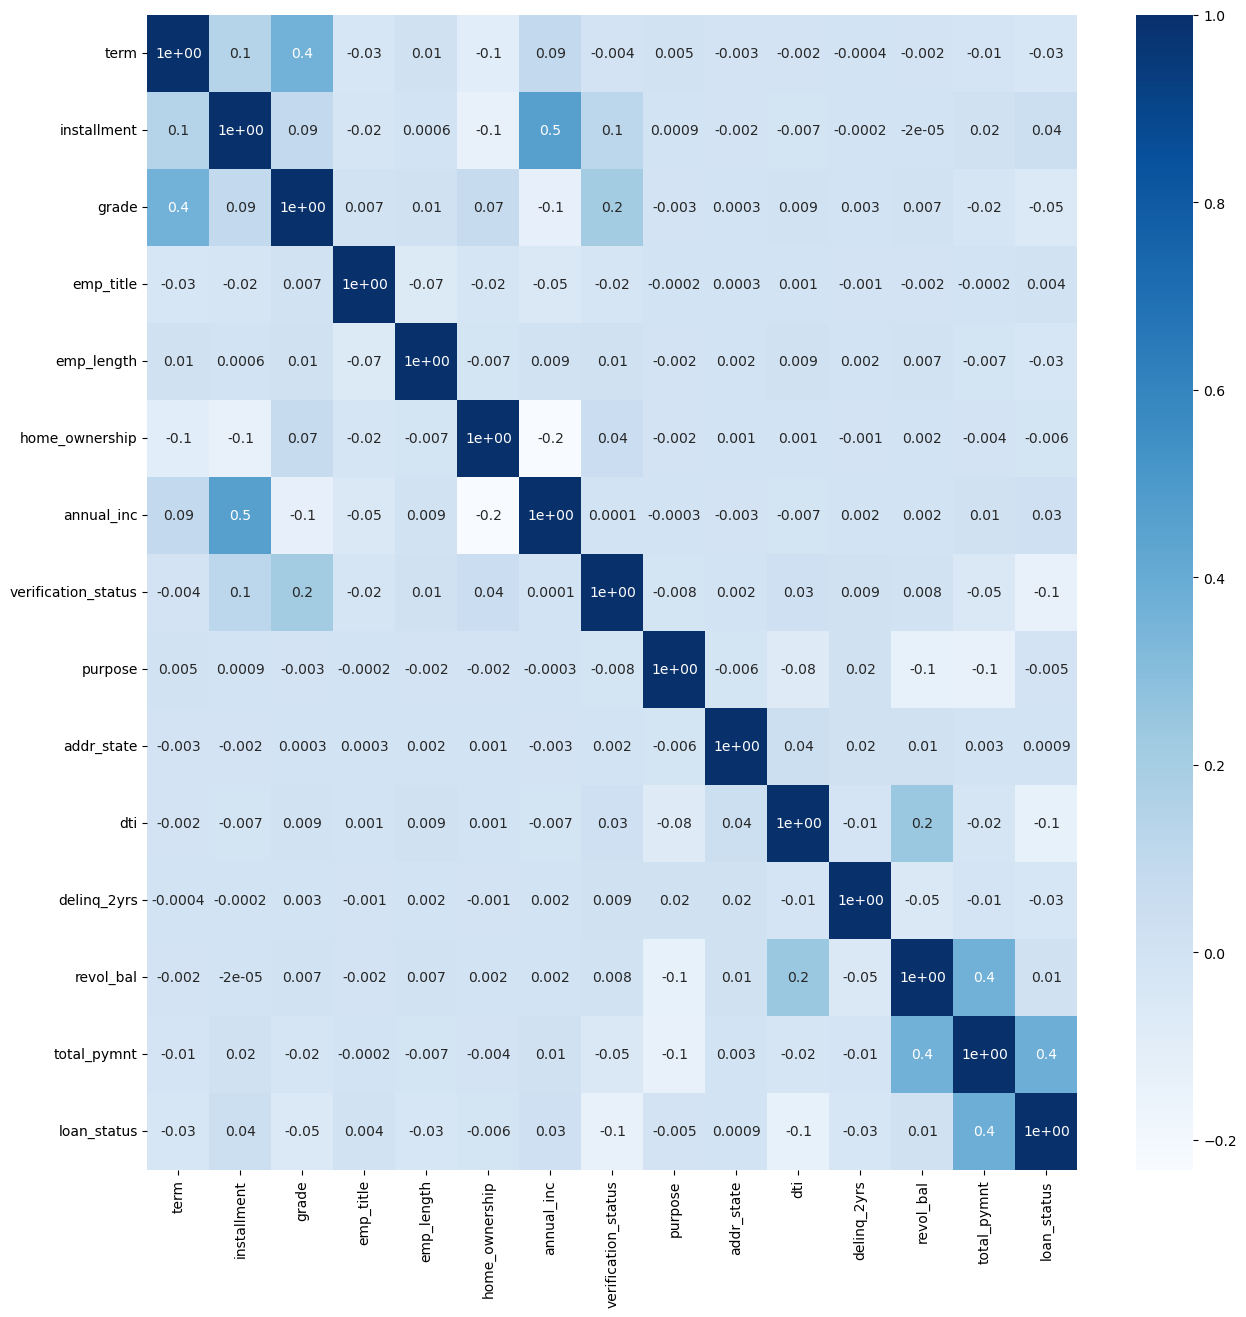

In [72]:
# Pearson plot the correlation between the variables
def cor_heatmap(cor):
    plt.figure(figsize=(15,15))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1')
    plt.show()
    
cor_heatmap(cor_pearson)


In [73]:
#Spearman Correlation Table:
cor_spearman = train_f.corr(method ='spearman')
cor_spearman

,term,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,revol_bal,total_pymnt,loan_status
term,1.000000,0.204229,0.354505,-0.026936,0.010643,-0.096756,0.119415,-0.004060,0.004425,-0.002847,-0.001457,-0.001983,-0.001337,-0.012313,-0.025892
installment,0.204229,1.000000,0.078524,-0.029256,0.000371,-0.142821,0.456303,0.092406,0.000750,-0.003023,-0.006059,0.000341,-0.000471,0.014787,0.033121
grade,0.354505,0.078524,1.000000,0.008942,0.011185,0.076155,-0.138126,0.213791,-0.003553,0.000230,0.009512,0.003826,0.008735,-0.022108,-0.059174
emp_title,-0.026936,-0.029256,0.008942,1.000000,-0.074059,-0.017991,-0.065925,-0.023350,-0.001867,0.000436,0.000537,-0.001861,-0.001887,-0.000183,0.003742
emp_length,0.010643,0.000371,0.011185,-0.074059,1.000000,-0.003171,0.013526,0.014758,-0.001797,0.001479,0.009291,0.001446,0.007119,-0.005899,-0.026669
home_ownership,-0.096756,-0.142821,0.076155,-0.017991,-0.003171,1.000000,-0.251291,0.044060,-0.001901,0.001233,0.001455,-0.001090,0.001247,-0.003441,-0.005348
annual_inc,0.119415,0.456303,-0.138126,-0.065925,0.013526,-0.251291,1.000000,-0.024338,-0.000380,-0.002176,-0.005178,0.001191,0.002933,0.010677,0.022705
verification_status,-0.004060,0.092406,0.213791,-0.023350,0.014758,0.044060,-0.024338,1.000000,-0.007218,0.001419,0.025330,0.010148,0.011225,-0.054057,-0.138640
purpose,0.004425,0.000750,-0.003553,-0.001867,-0.001797,-0.001901,-0.000380,-0.007218,1.000000,-0.005418,-0.074753,0.027543,-0.193821,-0.115538,-0.011837
addr_state,-0.002847,-0.003023,0.000230,0.000436,0.001479,0.001233,-0.002176,0.001419,-0.005418,1.000000,0.045823,0.017708,0.014525,0.003985,0.002762


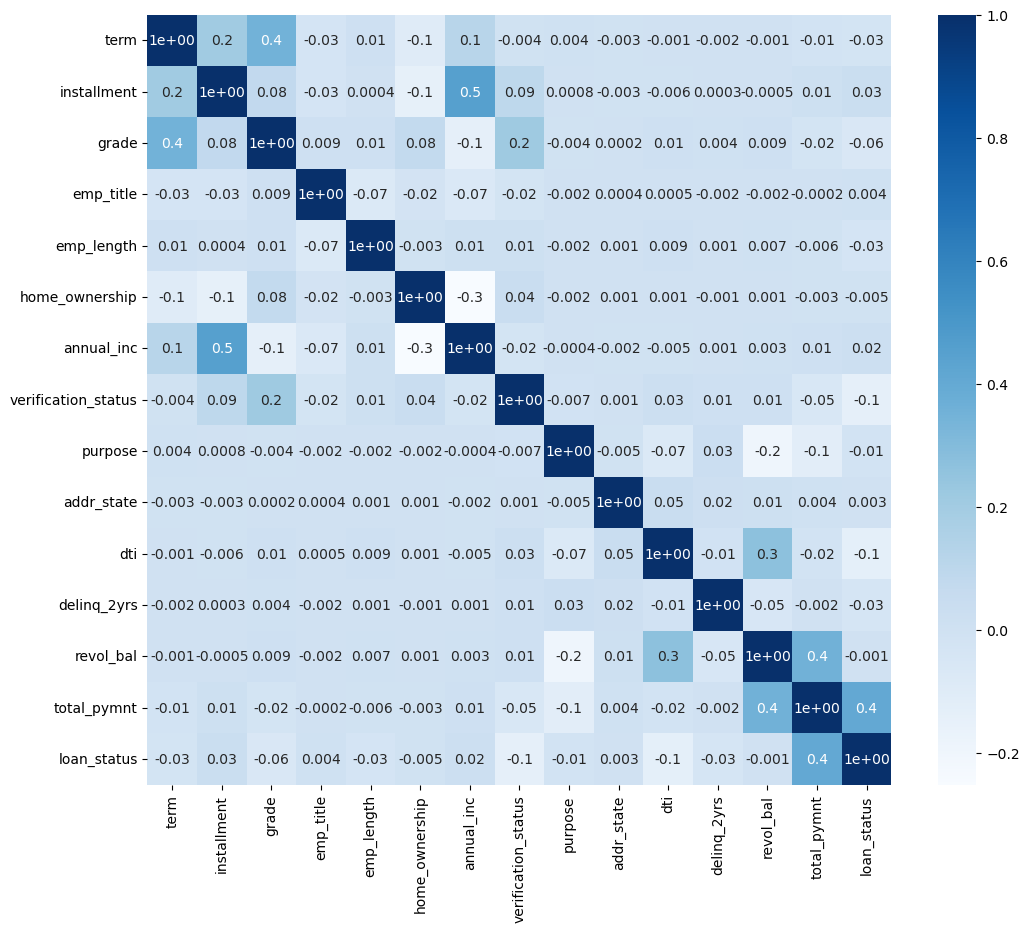

In [74]:
# Spearman plot the correlation between the variables
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Blues, fmt='.1')
    plt.show()
    
cor_heatmap(cor_spearman)

#### 4.3 ANOVA Test.

In [75]:
#ANOVA

#This test, will explain us which independent variables are more relevant or significant for prediciton on relationship with
#the target variable, according the k that we will select.

#Assining the data
A_data = train_f.drop('loan_status', axis = 1)
A_target = train_f['loan_status'].copy()

#Implementing the ANOVA
anova = SelectKBest(f_classif, k=6)

#Fitting 
X_anova = anova.fit_transform(A_data, A_target)

#Results
selected_features = pd.Series(anova.get_support(), index = A_data.columns)
selected_features

#So, we can conclude the Installment, grade, verification_status, dti, delin_2yrs, and total_pymnt are the most important 
# 6 variables that explain our target variable.

term                   False
installment             True
grade                   True
emp_title              False
emp_length             False
home_ownership         False
annual_inc             False
verification_status     True
purpose                False
addr_state             False
dti                     True
delinq_2yrs             True
revol_bal              False
total_pymnt             True
dtype: bool

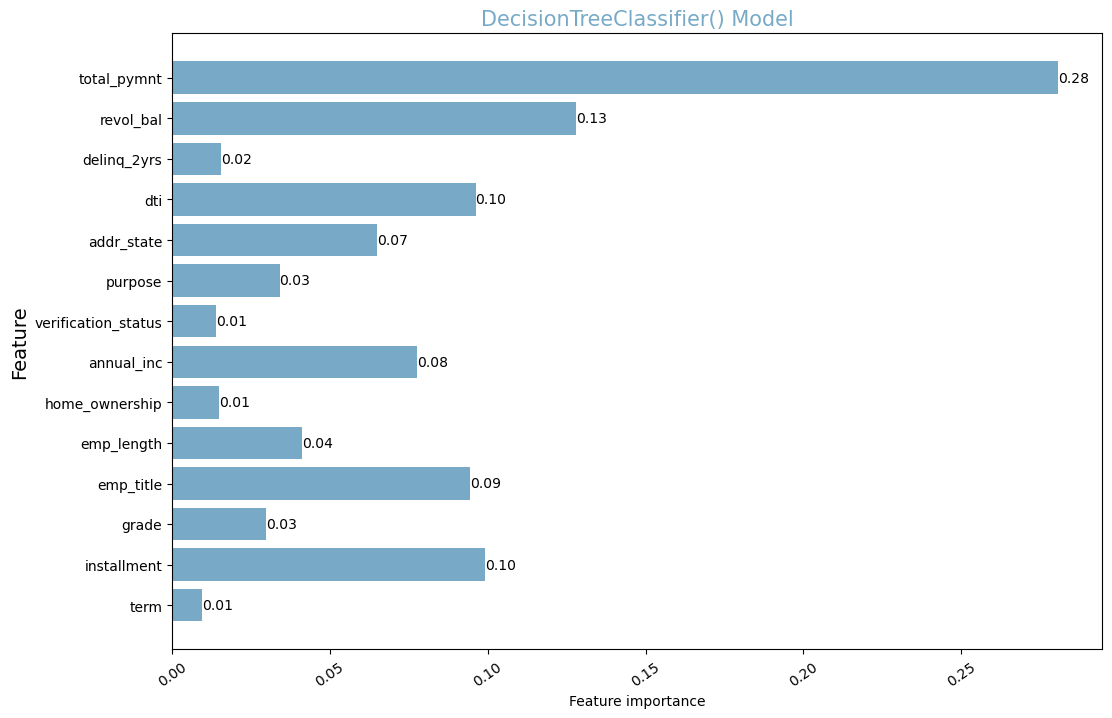

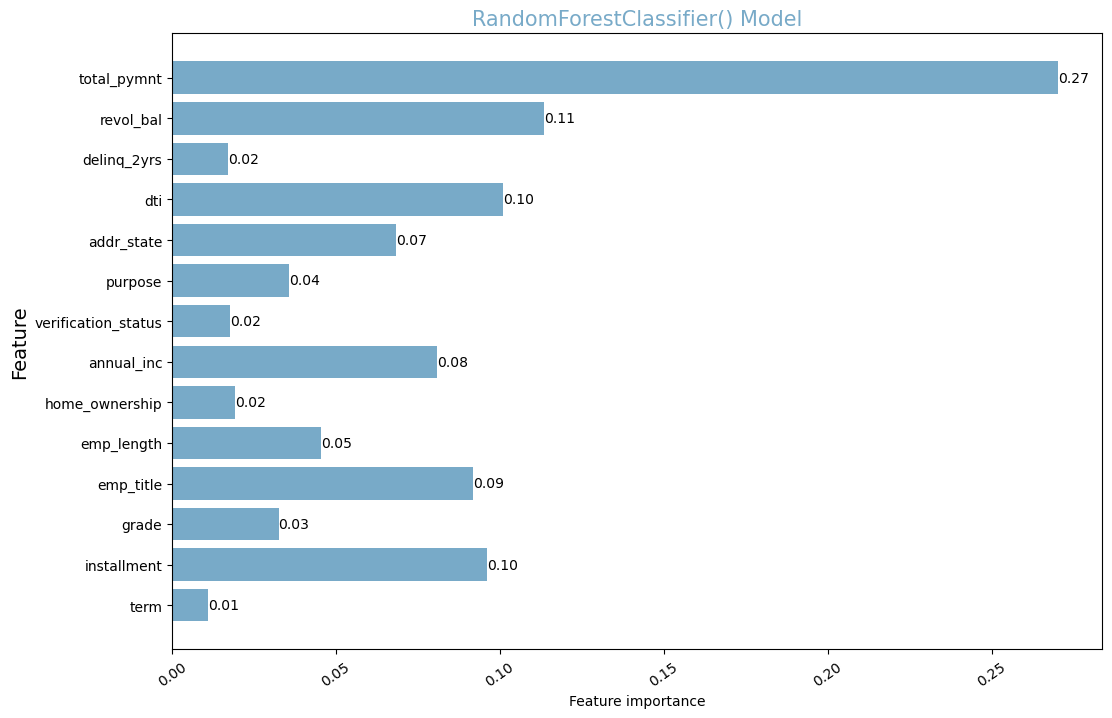

In [76]:
#Understand how important each variable it is using the Decision Tree and Random Forest:

#feature importance plots for the variables (features) in the dataset concerning their significance or importance
#in predicting the target variable ('loan_status' in this case) using two machine learning models: Decision Tree and
#Random Forest.

# Assuming train_f contains your dataset

# Assigning the data
DT_data = train_f.drop('loan_status', axis=1)
DT_target = train_f['loan_status'].copy()

# Creating models and fitting the models
# Decision Tree
DT_sel = DecisionTreeClassifier()
DT_sel.fit(DT_data, DT_target)

# Random Forest
F_sel = RandomForestClassifier()
F_sel.fit(DT_data, DT_target)

# Plot to see the most important features for this model
def plot_feature_importances(model, data_columns):
    n_features = len(data_columns)
    plt.figure(figsize=(12, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='#78AAC8')
    plt.yticks(np.arange(n_features), data_columns) # Sets y-axis ticks as feature names.
    plt.title(str(model) + " Model", color='#78AAC8', size=15)
    plt.xlabel('Feature importance', loc='center')
    plt.ylabel('Feature', loc='center', size=14)
    plt.xticks(rotation=35)

    for i, v in enumerate(model.feature_importances_):
        plt.text(v, i, f'{v:.2f}', color='black', va='center')

    plt.show()

# Decision Tree
plot_feature_importances(DT_sel, DT_data.columns)

# Random Forest
plot_feature_importances(F_sel, DT_data.columns)

In [77]:
# We do not have a very small value, regarding the other variables. So, we will keep this variables.

<a class="anchor" id="Models">   

    
 # 5. Data Test & Train & Validation


</a>

- 5.1 Creation and Treating the Train & Test & Validation . <br>

#### 5.1 Creation and Treating the Train & Test & Validation.

In [78]:
# make a copy of dataset to keep the source untouched
# for this, we use the "values" attribute to transform a Pandas DataFrame to a NumPy array.
raw_csv_data = train_f.values

# The inputs are all columns in the csv, except for the first one [:,0]
# (which is just the arbitrary customer IDs that bear no useful information),
# and the last one [:,-1] (which is our targets)

unscaled_inputs_all = train_f.drop('loan_status', axis = 1) # Means all columns less the target.


# The targets are in the last column. That's how datasets are conventionally organized.
targets_all = train_f['loan_status'] # Only the target Column.

# We have extracted the inputs and the targets.

# Count how many targets are 1 (meaning that the number of defaulted customers)
num_one_targets = int(np.sum(targets_all))

# Set a counter for targets that are 0 (meaning that the customer did not default)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declare a variable that will do that:
indices_to_remove = []
# For now, it is empty. But we want it to be a list or a tuple. So we put empty brackets.

# let´s balance the dataset
# Count the number of targets that are 0.
# Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets_all.shape[0]):   # the targets_all.shape[0] means basically the leangth of vector and will show us the number of all targets
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)  # I'll use the append method, which simply adds an element to a list.
# So if the counter for zeros is greater than the number of ones, all indices to be removed will be in the list.
# this will give us all targets we won't need.

# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)
# All right. We have a balance data set.
# But the inputs are currently unscaled.
# And note that standardizing them will greatly improve the algorithm.

# That's the only place we use sklearn functionality. We will take advantage of its preprocessing capabilities
# It's a simple line of code, which standardizes the inputs.
# At the end of this case, you can try to run the algorithm WITHOUT this line of code.
# The result will be interesting.
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

# preprocessing.scale is a method that standardize an array.
# remember, that´s the preprocessing library we imported from sklearn

# When the data was collected it was actually arranged by date
# or it could have an order based on some specific charecterstics of customers like location
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible.
# why?
# if the data has time dependency and it is ordered, each batch represents approximately
# a different day delivering loans. The effect of time and ordering the data make data in each batch homogeneous.
# But, between batches, it will be very heterogeneous, due to promotions, day of the week effects, and so on.
# This will confuse the stochastic gradient descent when the average across batches.

shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code,
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

# Save the three datasets in *.npz.
# You will see that it is extremely valuable to name them in such a coherent way!

np.savez('loan_data_train', inputs=train_inputs, targets=train_targets)
np.savez('loan_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('loan_data_test', inputs=test_inputs, targets=test_targets)

171297 248563 0.6891492297727336
21547 31070 0.6934985516575475
21505 31071 0.6921244890734125


<a class="anchor" id="Models">   

    
 # 6. Modelling Assessment


</a>

- 6.1 Logistic Regression Model. <br>
- 6.2 Random Forest Model. <br>
- 6.3 Gradient Boosting Classifier (GBM). <br>
- 6.4. Naive Bayes Algorithm. <br>

### 6.1 Logistic Regression Model.

In [79]:
#Creating the Logistic Regression model and Fitting the model
log_reg = LogisticRegression()
log_reg.fit(train_inputs, train_targets)

#Getting the predictions
labels_train_lr = log_reg.predict(train_inputs)
labels_val_lr = log_reg.predict(validation_inputs)

#Predictions Probabilities
log_reg.predict_proba(validation_inputs)

#Imports Needed to make the evaluations
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(train_targets, labels_train_lr))


print('--------------------- VALIDATION ---------------------')
print(classification_report(validation_targets, labels_val_lr))


print('--------------------- RESULTS ---------------------')
print('Train:', f1_score(train_targets, labels_train_lr))
print('Validation:', f1_score(validation_targets, labels_val_lr))


----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.65      0.46      0.53     77266
           1       0.78      0.89      0.83    171297

    accuracy                           0.75    248563
   macro avg       0.71      0.67      0.68    248563
weighted avg       0.74      0.75      0.74    248563

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.63      0.44      0.52      9523
           1       0.78      0.89      0.83     21547

    accuracy                           0.75     31070
   macro avg       0.71      0.67      0.68     31070
weighted avg       0.74      0.75      0.74     31070

--------------------- RESULTS ---------------------
Train: 0.8320857839582027
Validation: 0.831846468514731


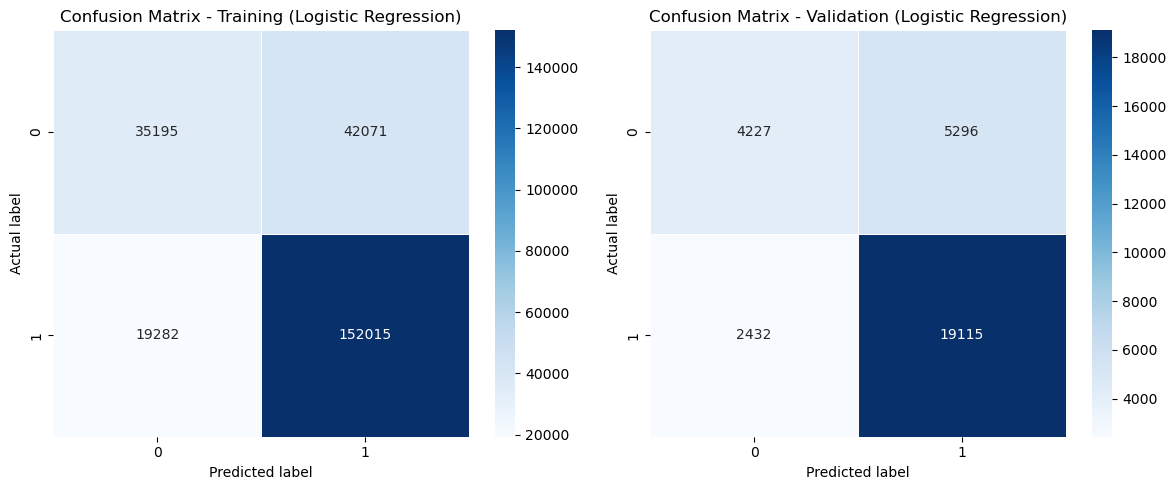

In [80]:
#Calculate Confusion Matrices Logistic Regression:

# Calculate confusion matrices for training and validation sets
cm_train = confusion_matrix(train_targets, labels_train_lr)
cm_val = confusion_matrix(validation_targets, labels_val_lr)

# Plot confusion matrix for training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data=cm_train, linewidths=.5, annot=True, cmap='Blues',fmt='')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training (Logistic Regression)', size=12)

# Plot confusion matrix for validation set
plt.subplot(1, 2, 2)
sns.heatmap(data=cm_val, linewidths=.5, annot=True, cmap='Blues',fmt='')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation (Logistic Regression)', size=12)

plt.tight_layout()
plt.show()


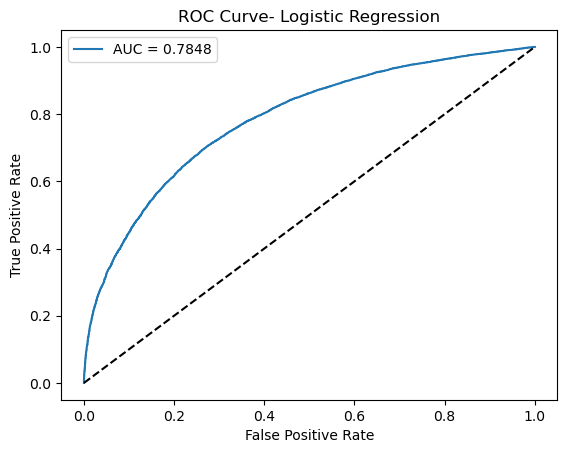

In [81]:
#Calculate Roc Curve Logistic Regression:

# Getting predicted probabilities for the positive class (class 1)
y_pred_proba = log_reg.predict_proba(validation_inputs)[:, 1]

# Calculating fpr, tpr, thresholds for the ROC curve
#False Positive Rates (FPR),True Positive Rates (TPR), thresholds determine the classification of samples as positive
#or negative.
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba) 

# Calculating AUC
auc = roc_auc_score(validation_targets, y_pred_proba) #AUC represents the area under the ROC curve.

# Plotting ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Logistic Regression')
plt.legend()
plt.show()

### 6.2 Random Forest Model.

In [82]:
#Create Random Forest Classifier model and fitting the model
modelclf=RandomForestClassifier(n_estimators=50)
modelclf.fit(train_inputs,train_targets)

#Information About Random Forest
print('The defined Random Forest have: ' + str(modelclf.get_params()))

#Getting the predictions
labels_rf_tr = modelclf.predict(train_inputs)
labels_rf_val = modelclf.predict(validation_inputs)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(train_targets, labels_rf_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(validation_targets, labels_rf_val))


print('--------------------- RESULTS ---------------------')
print('Train:', modelclf.score(train_inputs, train_targets))
print('Validation:', modelclf.score(validation_inputs, validation_targets))


The defined Random Forest have: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77266
           1       1.00      1.00      1.00    171297

    accuracy                           1.00    248563
   macro avg       1.00      1.00      1.00    248563
weighted avg       1.00      1.00      1.00    248563

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.66      0.51      0.58      9523
           1       0.80      0.

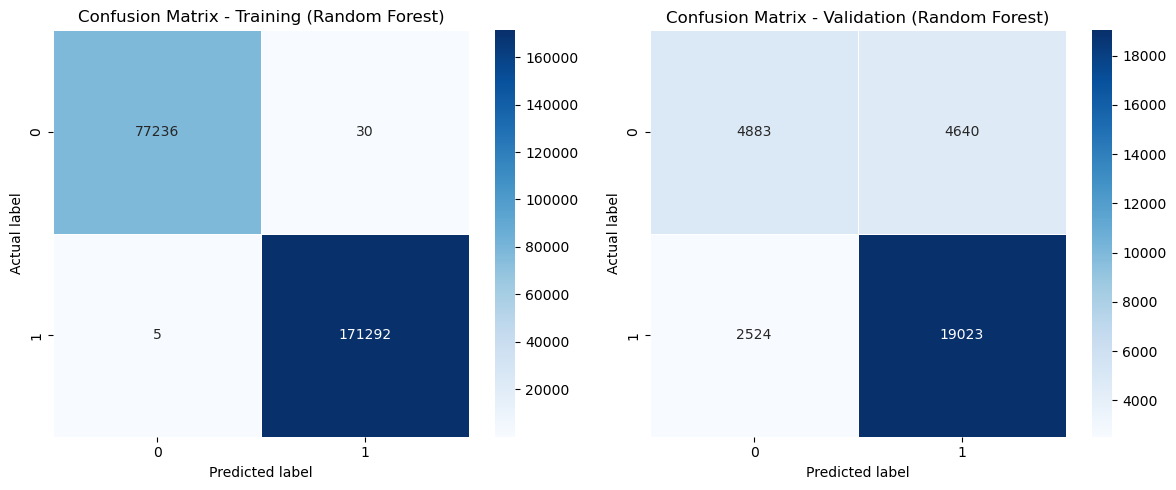

In [83]:
#Calculate Confusion Matrices Random Forest:

# Calculate confusion matrices for training and validation sets
cm_rf_train = confusion_matrix(train_targets, labels_rf_tr)
cm_rf_val = confusion_matrix(validation_targets, labels_rf_val)

# Plot confusion matrix for training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data=cm_rf_train, linewidths=.5, annot=True, cmap='Blues',fmt='')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training (Random Forest)', size=12)

# Plot confusion matrix for validation set
plt.subplot(1, 2, 2)
sns.heatmap(data=cm_rf_val, linewidths=.5, annot=True, cmap='Blues',fmt='')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation (Random Forest)', size=12)

plt.tight_layout()
plt.show()

plt.show()


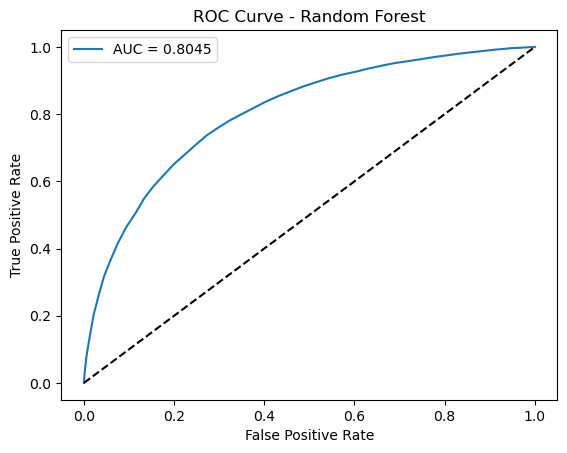

In [84]:
#Calculate Roc Curve Random Forest:

# Getting predicted probabilities for the positive class (class 1) for validation set
y_pred_proba_val = modelclf.predict_proba(validation_inputs)[:, 1]

# Calculating fpr, tpr, thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba_val)

# Calculating AUC
auc = roc_auc_score(validation_targets, y_pred_proba_val)

# Plotting ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


### 6.3 Gradient Boosting Classifier (GBM).


In [85]:
# Gradient Boosting Model:

# Creating the model and fitting the model
model_gb = GradientBoostingClassifier(n_estimators = 50)
model_gb.fit(train_inputs, train_targets)

#Getting Predictions
labels_gb_tr = model_gb.predict(train_inputs)
labels_gb_val = model_gb.predict(validation_inputs)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(train_targets, labels_gb_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(validation_targets, labels_gb_val))

print('--------------------- RESULTS ---------------------')
print('Train:', model_gb.score(train_inputs, train_targets))
print('Validation:', model_gb.score(validation_inputs, validation_targets))

----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.69      0.47      0.56     77266
           1       0.79      0.90      0.84    171297

    accuracy                           0.77    248563
   macro avg       0.74      0.69      0.70    248563
weighted avg       0.76      0.77      0.76    248563

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.68      0.47      0.56      9523
           1       0.79      0.90      0.85     21547

    accuracy                           0.77     31070
   macro avg       0.74      0.69      0.70     31070
weighted avg       0.76      0.77      0.76     31070

--------------------- RESULTS ---------------------
Train: 0.7703881913237288
Validation: 0.7711297071129707


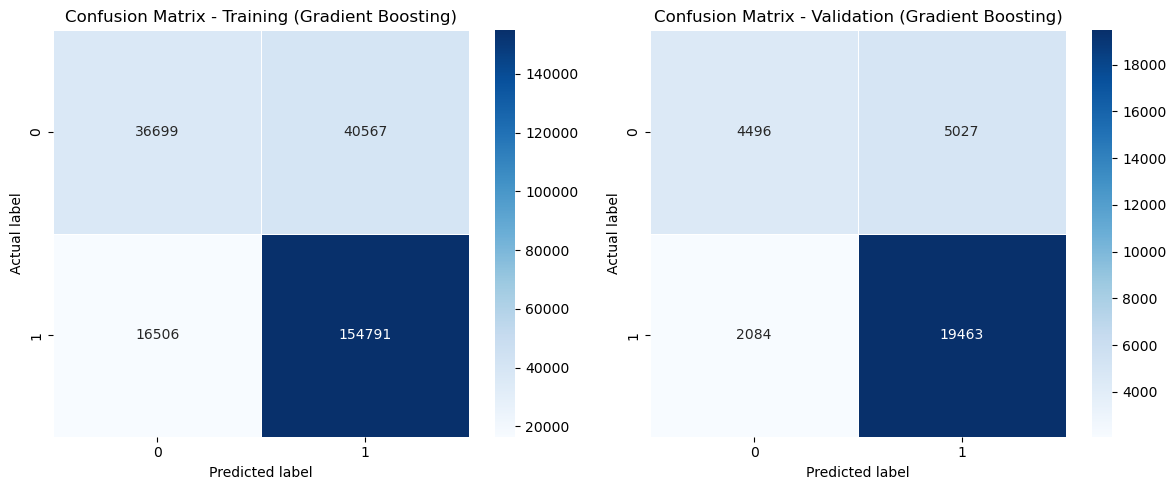

In [86]:
#Calculate Confusion Matrices Gradient Boosting:

# Calculate confusion matrices for training and validation sets
cm_gb_train = confusion_matrix(train_targets, labels_gb_tr)
cm_gb_val = confusion_matrix(validation_targets, labels_gb_val)

# Plot confusion matrix for training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data=cm_gb_train, linewidths=.5, annot=True, cmap='Blues',fmt='') #fmt is for appear the full number.
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training (Gradient Boosting)', size=12)

# Plot confusion matrix for validation set
plt.subplot(1, 2, 2)
sns.heatmap(data=cm_gb_val, linewidths=.5, annot=True, cmap='Blues',fmt='') #fmt is for appear the full number.
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation (Gradient Boosting)', size=12)

plt.tight_layout()
plt.show()

plt.show()

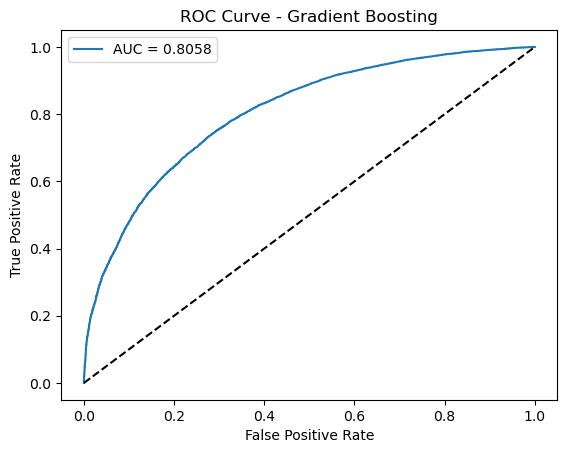

In [87]:
#Calculate Roc Curve Gradient Boosting:

# Getting predicted probabilities for the positive class (class 1) for validation set
y_pred_proba_val = model_gb.predict_proba(validation_inputs)[:, 1]

# Calculating fpr, tpr, thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba_val)

# Calculating AUC
auc = roc_auc_score(validation_targets, y_pred_proba_val)

# Plotting ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

### 6.4. Naive Bayes Algorithm.

In [88]:
# Naive Bayes Model:

# Creating the model and fitting the model
model_ba = GaussianNB()
model_ba.fit(train_inputs, train_targets)

#Getting Predictions
labels_ba_tr = model_ba.predict(train_inputs)
labels_ba_val = model_ba.predict(validation_inputs)

#Evaluation
print('----------------------- TRAIN -----------------------')
print(classification_report(train_targets, labels_ba_tr))

print('--------------------- VALIDATION ---------------------')
print(classification_report(validation_targets, labels_ba_val))


print('--------------------- RESULTS ---------------------')
print('Train:', model_ba.score(train_inputs, train_targets))
print('Validation:', model_ba.score(validation_inputs, validation_targets))


----------------------- TRAIN -----------------------
              precision    recall  f1-score   support

           0       0.55      0.52      0.53     77266
           1       0.79      0.81      0.80    171297

    accuracy                           0.72    248563
   macro avg       0.67      0.66      0.67    248563
weighted avg       0.71      0.72      0.72    248563

--------------------- VALIDATION ---------------------
              precision    recall  f1-score   support

           0       0.54      0.51      0.53      9523
           1       0.79      0.81      0.80     21547

    accuracy                           0.72     31070
   macro avg       0.67      0.66      0.66     31070
weighted avg       0.71      0.72      0.72     31070

--------------------- RESULTS ---------------------
Train: 0.7182525154588575
Validation: 0.7178628902478275


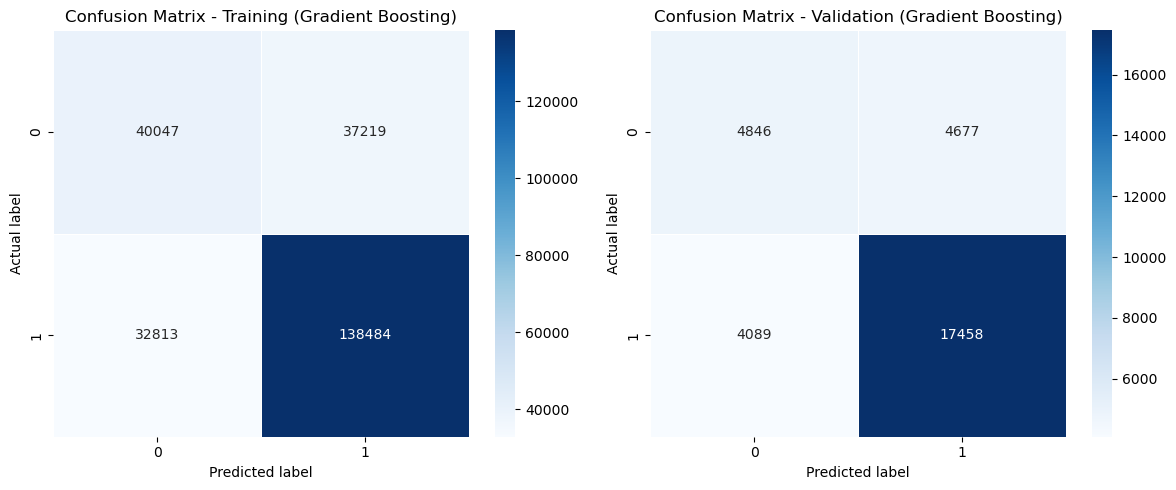

In [89]:
#Calculate Confusion Matrices Naive Bayes:

# Calculate confusion matrices for training and validation sets
cm_ba_train = confusion_matrix(train_targets, labels_ba_tr)
cm_ba_val = confusion_matrix(validation_targets, labels_ba_val)

# Plot confusion matrix for training set
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(data=cm_ba_train, linewidths=.5, annot=True, cmap='Blues',fmt='') #fmt is for appear the full number.
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Training (Gradient Boosting)', size=12)

# Plot confusion matrix for validation set
plt.subplot(1, 2, 2)
sns.heatmap(data=cm_ba_val, linewidths=.5, annot=True, cmap='Blues',fmt='') #fmt is for appear the full number.
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Validation (Gradient Boosting)', size=12)

plt.tight_layout()
plt.show()

plt.show()

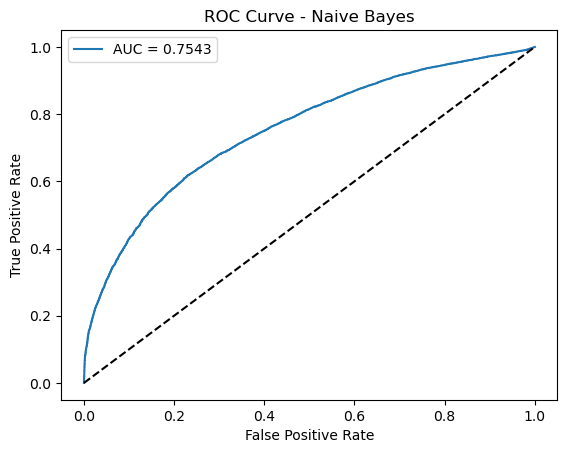

In [90]:
#Calculate Roc Curve Naive Bayes:

# Getting predicted probabilities for the positive class (class 1) for validation set
y_pred_proba_val = model_ba.predict_proba(validation_inputs)[:, 1]

# Calculating fpr, tpr, thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba_val)

# Calculating AUC
auc = roc_auc_score(validation_targets, y_pred_proba_val)

# Plotting ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

<a class="anchor" id="Models">   

    
 # 7. Deep Model


</a>

 <br>


In [91]:

# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('loan_data_train.npz')

# remember that we save the NPZs in 2 tuple form comprising "inputs" and "targets".
# Let's start from the inputs and extract them into a new variable called train inputs.
# we must ensure that inputs are all floats, let's also take care of that by .astype(np.float)
train_inputs = npz['inputs'].astype(np.float64)

# we can do the same for targets which are zero and one.
# But we are not sure that their data type is integer, float or boolean!
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(int)

# we load the validation data in the temporary variable
npz = np.load('loan_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

# we load the test data in the temporary variable
npz = np.load('loan_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

# Set the input and output sizes
input_size = 14
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50

# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use,
# the loss function, 'sparse_categorical_crossentropy'
# We use this loss to ensure that our integer Targets are one hot encoded appropriately when calculating loss.
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Training
# That's where we train the model we have built.

# Two hyperparameters:
# (1) set the batch size
batch_size = 100

# (2) set a maximum number of training epochs
max_epochs = 100

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )

Epoch 1/100
2486/2486 - 5s - loss: 0.4921 - accuracy: 0.7589 - val_loss: 0.4844 - val_accuracy: 0.7633 - 5s/epoch - 2ms/step
Epoch 2/100
2486/2486 - 3s - loss: 0.4811 - accuracy: 0.7667 - val_loss: 0.4847 - val_accuracy: 0.7624 - 3s/epoch - 1ms/step
Epoch 3/100
2486/2486 - 3s - loss: 0.4777 - accuracy: 0.7693 - val_loss: 0.4783 - val_accuracy: 0.7675 - 3s/epoch - 1ms/step
Epoch 4/100
2486/2486 - 3s - loss: 0.4754 - accuracy: 0.7705 - val_loss: 0.4771 - val_accuracy: 0.7684 - 3s/epoch - 1ms/step
Epoch 5/100
2486/2486 - 4s - loss: 0.4738 - accuracy: 0.7713 - val_loss: 0.4753 - val_accuracy: 0.7691 - 4s/epoch - 1ms/step
Epoch 6/100
2486/2486 - 3s - loss: 0.4724 - accuracy: 0.7719 - val_loss: 0.4738 - val_accuracy: 0.7701 - 3s/epoch - 1ms/step
Epoch 7/100
2486/2486 - 3s - loss: 0.4711 - accuracy: 0.7726 - val_loss: 0.4750 - val_accuracy: 0.7678 - 3s/epoch - 1ms/step
Epoch 8/100
2486/2486 - 3s - loss: 0.4703 - accuracy: 0.7733 - val_loss: 0.4726 - val_accuracy: 0.7705 - 3s/epoch - 1ms/step


2486/2486 - 4s - loss: 0.4578 - accuracy: 0.7801 - val_loss: 0.4692 - val_accuracy: 0.7744 - 4s/epoch - 2ms/step
Epoch 67/100
2486/2486 - 3s - loss: 0.4578 - accuracy: 0.7802 - val_loss: 0.4693 - val_accuracy: 0.7741 - 3s/epoch - 1ms/step
Epoch 68/100
2486/2486 - 3s - loss: 0.4578 - accuracy: 0.7800 - val_loss: 0.4693 - val_accuracy: 0.7722 - 3s/epoch - 1ms/step
Epoch 69/100
2486/2486 - 3s - loss: 0.4577 - accuracy: 0.7802 - val_loss: 0.4700 - val_accuracy: 0.7740 - 3s/epoch - 1ms/step
Epoch 70/100
2486/2486 - 3s - loss: 0.4578 - accuracy: 0.7796 - val_loss: 0.4700 - val_accuracy: 0.7722 - 3s/epoch - 1ms/step
Epoch 71/100
2486/2486 - 3s - loss: 0.4576 - accuracy: 0.7801 - val_loss: 0.4702 - val_accuracy: 0.7720 - 3s/epoch - 1ms/step
Epoch 72/100
2486/2486 - 4s - loss: 0.4575 - accuracy: 0.7803 - val_loss: 0.4691 - val_accuracy: 0.7738 - 4s/epoch - 1ms/step
Epoch 73/100
2486/2486 - 4s - loss: 0.4575 - accuracy: 0.7801 - val_loss: 0.4699 - val_accuracy: 0.7740 - 4s/epoch - 2ms/step
Epoch

In [92]:
# Set the input and output sizes
input_size = 14
output_size = 2
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50

# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use,
# the loss function, 'sparse_categorical_crossentropy'
# We use this loss to ensure that our integer Targets are one hot encoded appropriately when calculating loss.
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Training
# That's where we train the model we have built.

# Two hyperparameters:
# (1) set the batch size
batch_size = 100

# (2) set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )

Epoch 1/100
2486/2486 - 7s - loss: 0.4922 - accuracy: 0.7583 - val_loss: 0.4853 - val_accuracy: 0.7640 - 7s/epoch - 3ms/step
Epoch 2/100
2486/2486 - 4s - loss: 0.4820 - accuracy: 0.7656 - val_loss: 0.4810 - val_accuracy: 0.7654 - 4s/epoch - 1ms/step
Epoch 3/100
2486/2486 - 3s - loss: 0.4786 - accuracy: 0.7680 - val_loss: 0.4794 - val_accuracy: 0.7666 - 3s/epoch - 1ms/step
Epoch 4/100
2486/2486 - 4s - loss: 0.4765 - accuracy: 0.7695 - val_loss: 0.4783 - val_accuracy: 0.7686 - 4s/epoch - 2ms/step
Epoch 5/100
2486/2486 - 4s - loss: 0.4745 - accuracy: 0.7711 - val_loss: 0.4761 - val_accuracy: 0.7691 - 4s/epoch - 1ms/step
Epoch 6/100
2486/2486 - 4s - loss: 0.4726 - accuracy: 0.7719 - val_loss: 0.4750 - val_accuracy: 0.7696 - 4s/epoch - 1ms/step
Epoch 7/100
2486/2486 - 4s - loss: 0.4713 - accuracy: 0.7727 - val_loss: 0.4738 - val_accuracy: 0.7721 - 4s/epoch - 1ms/step
Epoch 8/100
2486/2486 - 4s - loss: 0.4702 - accuracy: 0.7740 - val_loss: 0.4731 - val_accuracy: 0.7710 - 4s/epoch - 1ms/step


In [93]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

971/971 [==============================] - 1s 1ms/step - loss: 0.4704 - accuracy: 0.7726

Test loss: 0.47. Test accuracy: 77.26%
